# Getting data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import bs4 as bs
import datetime as dt
from datetime import date
import time
import os
import pickle
import requests

import pandas as pd
import pandas_datareader.data as pdreader
import numpy as np
import json
import math
import matplotlib

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [0]:
from tqdm import tqdm_notebook

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


## daily stock price

In [0]:
def get_1stock_data_from_yahoo(ticker):
  #tickers = save_sp500_tickers()
  start = dt.datetime(2010, 1, 1)
  end = dt.datetime.now()

  main_df = pd.DataFrame()

  df = pdreader.DataReader(ticker, 'yahoo', start, end)
      #df.reset_index(inplace = True)
  #df.rename(columns={'Adj Close': ticker}, inplace=True)
  #df.drop(['Open', 'High', 'Low', 'Close', 'Volume','Adj Close'], 1, inplace=True)


  print(df.head())
  print(df.tail())
  #main_df.to_csv('sp500_joined_closes.csv')
  
  return df
  
    

In [0]:
target_stock = ['AAPL', 'MSFT','GOOGL','AMZN','IBM']

In [77]:
AAPL_df = get_1stock_data_from_yahoo('AAPL')

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2010-01-04  30.642857  30.340000  30.490000  30.572857  123432400.0  26.782711
2010-01-05  30.798571  30.464285  30.657143  30.625713  150476200.0  26.829010
2010-01-06  30.747143  30.107143  30.625713  30.138571  138040000.0  26.402260
2010-01-07  30.285715  29.864286  30.250000  30.082857  119282800.0  26.353460
2010-01-08  30.285715  29.865715  30.042856  30.282858  111902700.0  26.528664
                  High         Low  ...      Volume   Adj Close
Date                                ...                        
2019-07-24  209.149994  207.169998  ...  14991600.0  208.669998
2019-07-25  209.240005  206.729996  ...  13909600.0  207.020004
2019-07-26  209.729996  207.139999  ...  17618900.0  207.740005
2019-07-29  210.639999  208.440002  ...  21673400.0  209.679993
2019-07-30  210.160004  207.309998  ...  28020200.0  208.779999

In [0]:
#AAPL_learndf = AAPL_df[AAPL_df.index < '2019-01-01']

In [0]:
AAPL_learndf = AAPL_df

In [0]:
AAPL_learndf.shape

## news
https://developer.nytimes.com/my-apps/14a0e58c-916d-4614-bb67-76c726c1a87c

In [0]:
api =  "xvxAeIkOveoW8mSG8Aa29ipeuS5FGgBy"
data_dir = "drive/My Drive/DS/HasBrain-PracticalML/data/"

In [0]:
def download_json(data_dir, year, month, api):
    "Download news for a particular year and month and save as a json file"
    
    url = "http://api.nytimes.com/svc/archive/v1/{}/{}.json?api-key={}"
    url = url.format(year, month, api)
    
    file_str = data_dir  + str(year) + '-' + '{:02}'.format(month) + '.json'

    items = requests.get(url)
    
    try:
        data = items.json()

        with open(file_str, 'w') as f:
            json.dump(data, f)
    except:
        pass
    
    return "Finished downloading {}/{}".format(year, month)

In [0]:
# file_str = data_dir + str(2010) + '-' + '{:02}'.format(3) + '.json'
# with open(file_str) as data_file:    
#     NYTimes_data = json.load(data_file)
# NYTimes_data    
# for i in range(len(NYTimes_data["response"]["docs"][:])):
#   print(NYTimes_data["response"]["docs"][:][i]['headline']['main'])

In [0]:
def open_json(data_dir,year, month):
    "Save as pandas dataframe"
    file_str = data_dir + str(year) + '-' + '{:02}'.format(month) + '.json'
    with open(file_str) as data_file:    
        NYTimes_data = json.load(data_file)
    
    date_list = []
    df = pd.DataFrame()  
    df['News'] = None
    

    for i in range(len(NYTimes_data["response"]["docs"][:])):
        if NYTimes_data["response"]["docs"][i]["pub_date"][:10] not in df.index:
          try:
            df.loc[NYTimes_data["response"]["docs"][i]["pub_date"][:10]] = NYTimes_data["response"]["docs"][:][i]['headline']['main']
          except:
            pass
        else:
          try:
            df.loc[NYTimes_data["response"]["docs"][i]["pub_date"][:10]] = (df.loc[NYTimes_data["response"]["docs"][i]["pub_date"][:10]].values 
                                                                           + NYTimes_data["response"]["docs"][:][i]['headline']['main'])
          except:
            pass
    
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
    df.sort_index(inplace=True)
    
    return df

In [0]:
# # Uncomment to download it since 1990 to present
# for i in range(2010, 2019):
#   for j in range(1, 13):
#     download_json(data_dir, i, j, api)

# for j in range(1, 7):
# #for j in range(7, 13):  
#   download_json(data_dir, 2019, j, api)

In [0]:
download_json(data_dir, 2010, 3, api)

'Finished downloading 2010/3'

In [0]:
#2011-12
df = open_json(data_dir,2010, 3)
df


In [0]:
#df = open_json(data_dir,2019, 6)
def merge_news_price(df):
    all_news = pd.DataFrame()
    for i in tqdm_notebook(range(2010, 2019)):
        for j in tqdm_notebook(range(1, 13)):
            try:
                temp = open_json(data_dir, i, j)
                all_news = all_news.append(temp)
                print("Completed {}-{}".format(i, j))
            except:
                print("Failed merging data in {}-{}".format(i, j))
                pass
            
    
    
    return all_news

In [0]:
all_news = merge_news_price(df_process)

Completed 2010-1
Completed 2010-2
Completed 2010-3
Completed 2010-4
Completed 2010-5
Completed 2010-6
Completed 2010-7
Completed 2010-8
Completed 2010-9
Completed 2010-10
Completed 2010-11
Completed 2010-12


Completed 2011-1
Completed 2011-2
Completed 2011-3
Completed 2011-4
Completed 2011-5
Completed 2011-6
Completed 2011-7
Completed 2011-8
Completed 2011-9
Completed 2011-10
Completed 2011-11
Completed 2011-12


Completed 2012-1
Completed 2012-2
Completed 2012-3
Completed 2012-4
Completed 2012-5
Completed 2012-6
Completed 2012-7
Completed 2012-8
Completed 2012-9
Completed 2012-10
Completed 2012-11
Completed 2012-12


Completed 2013-1
Completed 2013-2
Completed 2013-3
Completed 2013-4
Completed 2013-5
Completed 2013-6
Completed 2013-7
Completed 2013-8
Completed 2013-9
Completed 2013-10
Completed 2013-11
Completed 2013-12


Completed 2014-1
Completed 2014-2
Completed 2014-3
Completed 2014-4
Completed 2014-5
Completed 2014-6
Completed 2014-7
Completed 2014-8
Completed 2014-9
Completed 2014-10
Completed 2014-11
Completed 2014-12


Completed 2015-1
Completed 2015-2
Completed 2015-3
Completed 2015-4
Completed 2015-5
Completed 2015-6
Completed 2015-7
Completed 2015-8
Completed 2015-9
Completed 2015-10
Completed 2015-11
Completed 2015-12


Completed 2016-1
Completed 2016-2
Completed 2016-3
Completed 2016-4
Completed 2016-5
Completed 2016-6
Completed 2016-7
Completed 2016-8
Completed 2016-9
Completed 2016-10
Completed 2016-11
Completed 2016-12


Completed 2017-1
Completed 2017-2
Completed 2017-3
Completed 2017-4
Completed 2017-5
Completed 2017-6
Completed 2017-7
Completed 2017-8
Completed 2017-9
Completed 2017-10
Completed 2017-11
Completed 2017-12


Completed 2018-1
Completed 2018-2
Completed 2018-3
Completed 2018-4
Completed 2018-5
Completed 2018-6
Completed 2018-7
Completed 2018-8
Completed 2018-9
Completed 2018-10
Completed 2018-11
Completed 2018-12



In [0]:
# check duplicated rows
all_news[all_news.index.duplicated()]

,News
2019-02-01,"Weekly Health Quiz: Weight, Cycling and a Pet ..."
2019-03-01,William Forsythe: ‘Isn’t Ballet Delightful?’Ex...
2019-04-01,For the Performing Arts Students in This Novel...
2019-05-01,The Designer Reimagining Traditional West Afri...
2019-06-01,"After SpaceX Starlink Launch, a Fear of Satell..."


In [0]:
all_news[all_news.index == '2019-02-01']

,News
2019-02-01,"Corrections: February 1, 2019Republicans Seize..."
2019-02-01,"Weekly Health Quiz: Weight, Cycling and a Pet ..."


In [0]:
# remove duplicated row
all_news = all_news[~all_news['News'].str.contains("After SpaceX Starlink Launch, a Fear")]

In [0]:
all_news.tail()

,News
2019-06-27,Indonesia Court Rejects Presidential Candidate...
2019-06-28,Joe Biden on Crime and Mass IncarcerationAll A...
2019-06-29,"Lets OutA Clash Over Inclusion at PrideMom, Ca..."
2019-06-30,The 1970 gay-rights march was more overtly rad...
2019-07-01,"Corrections: July 1, 2019A Global Gay Pride We..."


In [0]:
for i in tqdm_notebook(range(2019, 2020)):
    for j in tqdm_notebook(range(1, 7)):
        try:
            temp = open_json(data_dir, i, j)
            all_news = all_news.append(temp)
            print("Completed {}-{}".format(i, j))
        except:
            print("Failed merging data in {}-{}".format(i, j))
            pass

Completed 2019-1
Completed 2019-2
Completed 2019-3
Completed 2019-4
Completed 2019-5
Completed 2019-6



In [0]:
#save news
all_news.to_hdf(data_dir+'allnews_v1.h5', key='data')

# Data Processing

In [0]:
AAPL_learndf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-12,204.000000,202.199997,202.449997,203.300003,17595200.0,203.300003
2019-07-15,205.869995,204.000000,204.089996,205.210007,16947400.0,205.210007
2019-07-16,206.110001,203.500000,204.589996,204.500000,16866800.0,204.500000
2019-07-17,205.089996,203.270004,204.050003,203.350006,14107500.0,203.350006
2019-07-18,205.880005,203.699997,204.000000,205.660004,18540600.0,205.660004



## Technical indicator

   

*   MACD (Trend) 
*   Stochastics (Momentum)    
*   Average True Range (Volume)
*   Mean 'adj_close' of each month
*   Difference between high and low of each day
*   Difference between open and close of each day
*   Mean volume of each month


Similar code from https://github.com/alberduris/SirajsCodingChallenges/tree/master/Stock%20Market%20Prediction


**MACD**: The Moving Average Convergence/Divergence oscillator (MACD) is one of the simplest and most effective momentum indicators available. The MACD turns two trend-following indicators, moving averages, into a momentum oscillator by subtracting the longer moving average from the shorter moving average.


**Stochastics oscillator**: The Stochastic Oscillator is a momentum indicator that shows the location of the close relative to the high-low range over a set number of periods.


**Average True Range**:

Is an indicator to measure the volalitility (NOT price direction). The largest of:

Method A: Current High less the current Low Method B: Current High less the previous Close (absolute value) Method C: Current Low less the previous Close (absolute value)

Will use EGARCH to find volatility in the future



In [0]:
def MACD(df, period1, period2, periodSignal):
    EMA1 = pd.DataFrame.ewm(df,span=period1).mean() # Provides exponential weighted functions
    EMA2 = pd.DataFrame.ewm(df,span=period2).mean() 
    
    MACD = EMA1-EMA2
    Signal = pd.DataFrame.ewm(MACD,periodSignal).mean()
    
    Histogram = MACD-Signal
    return Histogram
  
def stochastics_oscillator(df,period):
    l, h = pd.DataFrame.rolling(df, period).min(), pd.DataFrame.rolling(df, period).max()
    k = 100 * (df - l) / (h - l)
    return k  

def ATR(df,period):
    '''
    Method A: Current High less the current Low
    '''
    df['H-L'] = abs(df['High']-df['Low'])
    df['H-PC'] = abs(df['High']-df['Close'].shift(1))
    df['L-PC'] = abs(df['Low']-df['Close'].shift(1))
    TR = df[['H-L','H-PC','L-PC']].max(axis=1)
    return TR.to_frame()

In [0]:
def get_mov_avg_std(df, col, N):
    """
    Given a dataframe, get mean and std dev at timestep t using values from t-1, t-2, ..., t-N.
    Inputs
        df         : dataframe. Can be of any length.
        col        : name of the column you want to calculate mean and std dev
        N          : get mean and std dev at timestep t using values from t-1, t-2, ..., t-N
    Outputs
        df_out     : same as df but with additional column containing mean and std dev
    """
    mean_list = df[col].rolling(window = N, min_periods=1).mean() # len(mean_list) = len(df)
    std_list = df[col].rolling(window = N, min_periods=1).std()   # first value will be NaN, because normalized by N-1
    
    # Add one timestep to the predictions
    mean_list = np.concatenate((np.array([np.nan]), np.array(mean_list[:-1])))
    std_list = np.concatenate((np.array([np.nan]), np.array(std_list[:-1])))
    
    # Append mean_list to df
    df_out = df.copy()
    df_out[col + '_mean'] = mean_list
    df_out[col + '_std'] = std_list
    
    return df_out

In [0]:
macd = MACD(AAPL_learndf['Adj Close'], 12, 26,9)
macd.rename(columns={'Close':'MACD'}, inplace=True)
macd.tail()


Date
2019-07-12    0.754875
2019-07-15    0.767639
2019-07-16    0.676948
2019-07-17    0.483841
2019-07-18    0.472538
dtype: float64

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


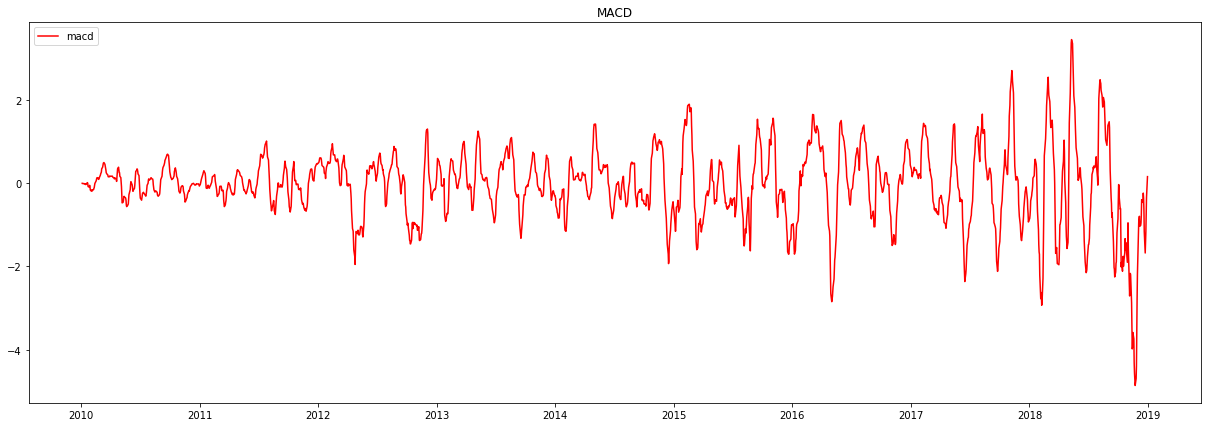

In [0]:
plt.figure(figsize=(21,7))
plt.plot(macd,label='macd',color='red')
plt.title('MACD')
plt.legend(loc='upper left')
plt.show()

In [0]:
stochastics = stochastics_oscillator(AAPL_learndf['Adj Close'], 14)
stochastics.rename(columns={'Close':'Stochastics'}, inplace=True)
stochastics.tail()

Date
2019-07-12     87.443427
2019-07-15    100.000000
2019-07-16     90.260550
2019-07-17     74.485618
2019-07-18    100.000000
dtype: float64

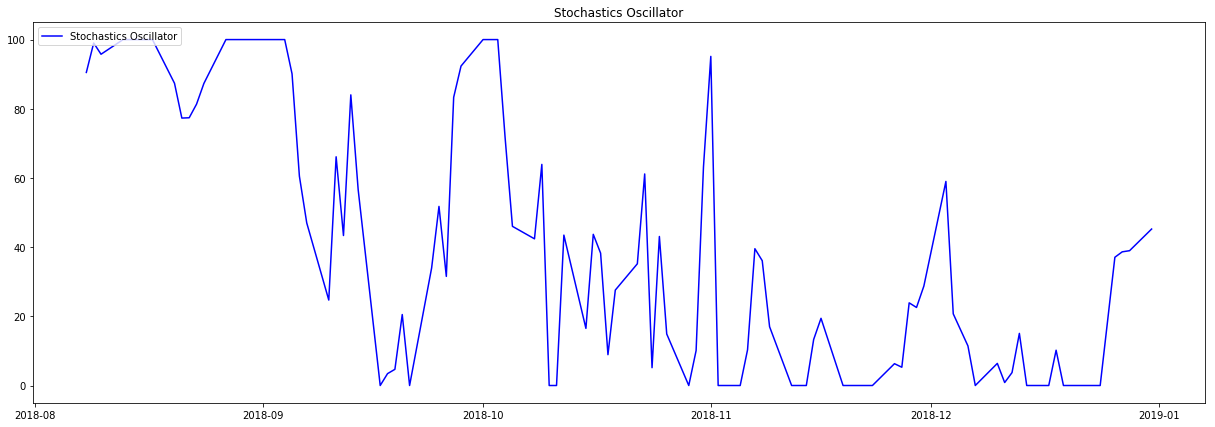

In [0]:
plt.figure(figsize=(21,7))
plt.plot(stochastics[-100:],label='Stochastics Oscillator',color='blue')
plt.title('Stochastics Oscillator')
plt.legend(loc='upper left')
plt.show()

In [0]:
atr = ATR(AAPL_learndf,14)
atr.rename(columns={0:'ATR'}, inplace=True)
atr.tail()

,ATR
Date,
2019-07-12,2.250000
2019-07-15,2.569992
2019-07-16,2.610001
2019-07-17,1.819992
2019-07-18,2.529999


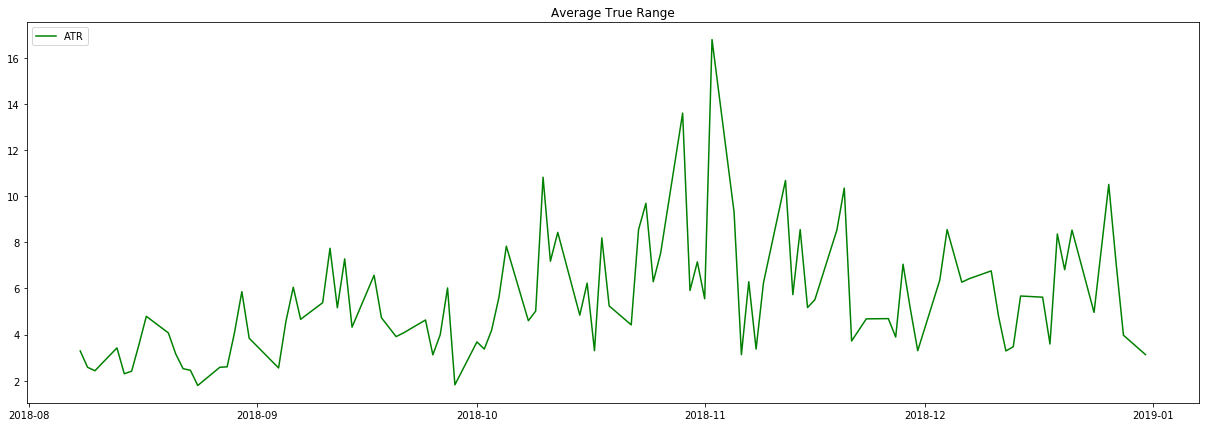

In [0]:
plt.figure(figsize=(21,7))
plt.plot(atr[-100:],label='ATR',color='green')
plt.title('Average True Range')
plt.legend(loc='upper left')
plt.show()

## Processing

In [0]:
df_process = pd.concat([AAPL_learndf, macd, stochastics, atr], axis=1)


In [0]:
df_process.rename(columns={0:'MACD', 1:'stochastics'}, inplace=True)

In [0]:
df_process.drop(['H-L', 'H-PC', 'L-PC'], axis=1 , inplace=True)
df_process.tail()

,High,Low,Open,Close,Volume,Adj Close,MACD,stochastics,ATR
Date,,,,,,,,,
2019-07-12,204.000000,202.199997,202.449997,203.300003,17595200.0,203.300003,0.754875,87.443427,2.250000
2019-07-15,205.869995,204.000000,204.089996,205.210007,16947400.0,205.210007,0.767639,100.000000,2.569992
2019-07-16,206.110001,203.500000,204.589996,204.500000,16866800.0,204.500000,0.676948,90.260550,2.610001
2019-07-17,205.089996,203.270004,204.050003,203.350006,14107500.0,203.350006,0.483841,74.485618,1.819992
2019-07-18,205.880005,203.699997,204.000000,205.660004,18540600.0,205.660004,0.472538,100.000000,2.529999


In [0]:
#save v1
df_process.to_hdf(data_dir+'technical500_v1.h5', key='data')

### Add date-based technical features

In [0]:
# Get difference between high and low of each day
df_process['range_hl'] = df_process['High'] - df_process['Low']
df_process.drop(['High', 'Low'], axis=1, inplace=True)

# Get difference between open and close of each day
df_process['range_oc'] = df_process['Open'] - df_process['Close']
df_process.drop(['Open', 'Close'], axis=1, inplace=True)


In [0]:
# Add a column 'order_day' to indicate the order of the rows by date
df_process['order_day'] = [x for x in list(range(len(df_process)))]

# merging_keys
merging_keys = ['order_day']

# List of columns that we will use to create lags
lag_cols = ['Adj Close', 'range_hl', 'range_oc', 'Volume']
lag_cols
df_process.tail()

,Volume,Adj Close,MACD,stochastics,ATR,range_hl,range_oc,order_day
Date,,,,,,,,
2018-12-24,37169200.0,145.642090,-1.676384,0.000000,4.960007,4.960007,1.319992,2259
2018-12-26,58582500.0,155.898438,-1.166758,37.074196,10.509995,10.509995,-8.869995,2260
2018-12-27,53117100.0,154.886688,-0.752747,38.640127,7.099991,6.699997,-0.309998,2261
2018-12-28,42291400.0,154.966034,-0.340175,38.971772,3.970001,3.970001,1.270004,2262
2018-12-31,35003500.0,156.463837,0.160444,45.232216,3.130005,2.880005,0.789993,2263


In [0]:
df_process = df_process.reset_index()

In [0]:
shift_range

[1, 2, 3]

In [0]:
N = 3 #for feature at day t, we use lags from t-1, t-2, ..., t-N as features
shift_range = [x+1 for x in range(N)]

for shift in tqdm_notebook(shift_range):
    train_shift = df_process[merging_keys + lag_cols].copy()
    
    # E.g. order_day of 0 becomes 1, for shift = 1.
    # So when this is merged with order_day of 1 in df, this will represent lag of 1.
    train_shift['order_day'] = train_shift['order_day'] + shift
    
    col_name = lambda x: '{}_lag_{}'.format(x, shift) if x in lag_cols else x
    train_shift = train_shift.rename(columns= col_name)

    df_process = pd.merge(df_process, train_shift, on=merging_keys, how='left') #.fillna(0)
    
del train_shift

# Remove the first N rows which contain NaNs
df_process = df_process[N:]
    
df_process.tail()

,Date,Volume,Adj Close,MACD,stochastics,ATR,range_hl,range_oc,order_day,Adj Close_lag_1,range_hl_lag_1,range_oc_lag_1,Volume_lag_1,Adj Close_lag_2,range_hl_lag_2,range_oc_lag_2,Volume_lag_2,Adj Close_lag_3,range_hl_lag_3,range_oc_lag_3,Volume_lag_3
3,2010-01-07,119282800.0,26.353460,-0.010794,NaN,0.421429,0.421429,0.167143,3,26.402260,0.639999,0.487143,138040000.0,26.829010,0.334286,0.031429,150476200.0,26.782711,0.302856,-0.082857,123432400.0
4,2010-01-08,111902700.0,26.528664,-0.005605,NaN,0.420000,0.420000,-0.240002,4,26.353460,0.421429,0.167143,119282800.0,26.402260,0.639999,0.487143,138040000.0,26.829010,0.334286,0.031429,150476200.0
5,2010-01-11,115557400.0,26.294640,-0.010447,NaN,0.650000,0.650000,0.384285,5,26.528664,0.420000,-0.240002,111902700.0,26.353460,0.421429,0.167143,119282800.0,26.402260,0.639999,0.487143,138040000.0
6,2010-01-12,148614900.0,25.995537,-0.023049,NaN,0.527143,0.478571,0.209999,6,26.294640,0.650000,0.384285,115557400.0,26.528664,0.420000,-0.240002,111902700.0,26.353460,0.421429,0.167143,119282800.0
7,2010-01-13,151473000.0,26.362217,-0.014061,NaN,0.975714,0.975714,-0.397142,7,25.995537,0.478571,0.209999,148614900.0,26.294640,0.650000,0.384285,115557400.0,26.528664,0.420000,-0.240002,111902700.0
8,2010-01-14,108223500.0,26.209538,-0.014177,NaN,0.232857,0.205713,0.097143,8,26.362217,0.975714,-0.397142,151473000.0,25.995537,0.478571,0.209999,148614900.0,26.294640,0.650000,0.384285,115557400.0
9,2010-01-15,148516900.0,25.771528,-0.032354,NaN,0.818571,0.818571,0.714285,9,26.209538,0.205713,0.097143,108223500.0,26.362217,0.975714,-0.397142,151473000.0,25.995537,0.478571,0.209999,148614900.0
10,2010-01-19,182501900.0,26.911612,0.010154,NaN,1.322857,1.135714,-0.958570,10,25.771528,0.818571,0.714285,148516900.0,26.209538,0.205713,0.097143,108223500.0,26.362217,0.975714,-0.397142,151473000.0
11,2010-01-20,153038200.0,26.497383,0.017285,NaN,0.864285,0.864285,0.454287,11,26.911612,1.135714,-0.958570,182501900.0,25.771528,0.818571,0.714285,148516900.0,26.209538,0.205713,0.097143,108223500.0
12,2010-01-21,152038600.0,26.039341,-0.000963,NaN,0.871428,0.871428,0.572857,12,26.497383,0.864285,0.454287,153038200.0,26.911612,1.135714,-0.958570,182501900.0,25.771528,0.818571,0.714285,148516900.0


In [0]:
df_process.set_index('Date', inplace=True)

In [0]:
df_process.shape

(2261, 20)

In [0]:
AAPL_learndf.shape

(2264, 9)

### Combine

In [5]:
pip install numpy==1.15.4

     |████████████████████████████████| 13.9MB 6.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


In [0]:
all_news = pd.read_hdf(data_dir + "allnews_v1.h5", "data")
all_news.tail()

,News
2019-06-27,Indonesia Court Rejects Presidential Candidate...
2019-06-28,Joe Biden on Crime and Mass IncarcerationAll A...
2019-06-29,"Lets OutA Clash Over Inclusion at PrideMom, Ca..."
2019-06-30,The 1970 gay-rights march was more overtly rad...
2019-07-01,"Corrections: July 1, 2019A Global Gay Pride We..."


In [0]:
df_final = pd.concat([df_process, all_news], axis=1)

In [0]:
df_final.dropna(axis=0, inplace=True)
print(df_final.shape)


(2374, 10)


In [0]:
df_final.head()

,High,Low,Open,Close,Volume,Adj Close,MACD,stochastics,ATR,News
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Along Boston’s HarborA Weekend in Tucson, Ariz..."
2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Celebrating History in Nara, JapanCairo Aglow ..."
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alternative LivingHigh-Speed ConnectionsThe Hi...
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.782711,0.000000,NaN,0.302856,"In Galleon Cases, Timing Could Be Everything‘A..."
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.829010,0.000492,NaN,0.334286,Rajaratnam Expected to Face Additional Charges...


In [0]:
#save news
df_final.to_hdf(data_dir+'df_final_v1.h5', key='data')

## Sentiment analyze

In [0]:
df_final = pd.read_hdf(data_dir + "df_final_v1.h5", "data")
df_final.tail()

,High,Low,Open,Close,Volume,Adj Close,MACD,stochastics,ATR,News
2019-06-25,199.259995,195.289993,198.429993,195.570007,21070300.0,195.570007,2.443034,72.682599,3.970001,Quotation of the Day: Democrats Split Over Bil...
2019-06-26,200.990005,197.350006,197.770004,199.800003,26067500.0,199.800003,2.380348,100.000000,5.419998,"Corrections: June 26, 2019DealBook Briefing: S..."
2019-06-27,201.570007,199.570007,200.289993,199.740005,20899700.0,199.740005,2.252362,99.169009,2.000000,Indonesia Court Rejects Presidential Candidate...
2019-06-28,199.500000,197.050003,198.679993,197.919998,31110600.0,197.919998,1.953487,73.371026,2.690002,Joe Biden on Crime and Mass IncarcerationAll A...
2019-07-01,204.490005,200.649994,203.169998,201.550003,27316700.0,201.550003,1.932708,100.000000,6.570007,"Corrections: July 1, 2019A Global Gay Pride We..."


In [0]:
df_final.drop(['Open', 'High', 'Low', 'Close'], axis=1, inplace=True)
df_final.head()

,Volume,Adj Close,MACD,stochastics,ATR,News
2010-01-22,220441900.0,24.747818,-0.077667,0.000000,1.558571,Cameras Swarm Rajaratnam at RestaurantYearning...
2010-01-25,266424900.0,25.413599,-0.090259,30.769156,0.992857,Judge Allows S.E.C. to Add Galleon Case Charge...
2010-01-26,466777500.0,25.772774,-0.075558,47.368463,1.590000,"Without Treaty, Pollution-Fighting Firms Set C..."
2010-01-27,430642100.0,26.015560,-0.049005,58.588868,1.578571,Kurland Pleads Guilty in Galleon Insider CaseK...
2010-01-28,293375600.0,24.940546,-0.088354,8.906951,1.311430,"Wired Kids, Negligent Parents?Wall St. Tries t..."


**Using NLTK sentiment analyzer to generate a polarity score**

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

https://www.nltk.org/_modules/nltk/sentiment/sentiment_analyzer.html


In [0]:
from nltk.sentiment import SentimentAnalyzer
import unicodedata
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [0]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
!pip3 install flair
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

In [0]:
from textblob import TextBlob

In [0]:
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [0]:
df_final.loc['2019-03-01', 'News']

'The Eagles of Reelfoot LakeMorality and Michael CohenQuotation of the Day: Sleaze Intrudes Among the Palm TreesJames Harden Scores 58, the Most the Heat Have Given Up, in a Rockets WinYour Food ObsessionJames Harden Scores 58, the Most the Heat Have Given Up, in a Rockets WinYour Food ObsessionBoardwalk’s LocaleMexico Approves 60,000-Strong Security Force. Critics Call It More of the Same.A Clash at the Cohen Hearing Reveals the Left’s Racial Divide‘Star Trek: Discovery’ Season 2, Episode 7: A Young SpockThe Shows That Made HBO a Cultural ForceWord + Quiz: pilferWhy Allen Weisselberg, Trump’s Money Man, Could Face Scrutiny NextThe Tallest Man I Ever LovedRussia Blocks Venezuela Measure at U.N., Calling It a U.S. Ploy for Regime ChangeOn Politics: Trump Ordered Kushner’s Security ClearanceYour Morning BriefingRussia Blocks Venezuela Measure at U.N., Calling It a U.S. Ploy for Regime ChangeOn Politics: Trump Ordered Kushner’s Security ClearanceMongols Biker Club Can Keep Its Logo, Judge

In [0]:
sentence = unicodedata.normalize('NFKD', df_final.loc['2019-03-01', 'News'])
sentence

'The Eagles of Reelfoot LakeMorality and Michael CohenQuotation of the Day: Sleaze Intrudes Among the Palm TreesJames Harden Scores 58, the Most the Heat Have Given Up, in a Rockets WinYour Food ObsessionJames Harden Scores 58, the Most the Heat Have Given Up, in a Rockets WinYour Food ObsessionBoardwalk’s LocaleMexico Approves 60,000-Strong Security Force. Critics Call It More of the Same.A Clash at the Cohen Hearing Reveals the Left’s Racial Divide‘Star Trek: Discovery’ Season 2, Episode 7: A Young SpockThe Shows That Made HBO a Cultural ForceWord + Quiz: pilferWhy Allen Weisselberg, Trump’s Money Man, Could Face Scrutiny NextThe Tallest Man I Ever LovedRussia Blocks Venezuela Measure at U.N., Calling It a U.S. Ploy for Regime ChangeOn Politics: Trump Ordered Kushner’s Security ClearanceYour Morning BriefingRussia Blocks Venezuela Measure at U.N., Calling It a U.S. Ploy for Regime ChangeOn Politics: Trump Ordered Kushner’s Security ClearanceMongols Biker Club Can Keep Its Logo, Judge

In [0]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(sentence)

{'compound': -0.913, 'neg': 0.097, 'neu': 0.839, 'pos': 0.064}

In [0]:
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels

total_sentiment

[POSITIVE (0.75252765417099)]

In [0]:
news = pd.DataFrame(df_final['News'])

In [0]:
news.head()

,News
2010-01-22,Cameras Swarm Rajaratnam at RestaurantYearning...
2010-01-25,Judge Allows S.E.C. to Add Galleon Case Charge...
2010-01-26,"Without Treaty, Pollution-Fighting Firms Set C..."
2010-01-27,Kurland Pleads Guilty in Galleon Insider CaseK...
2010-01-28,"Wired Kids, Negligent Parents?Wall St. Tries t..."


In [0]:
for index, row in tqdm_notebook(news.iterrows()):
  
  #print("{},   {}".format(index, row))
#   print(row.News)
#   print("\n")
  s = flair.data.Sentence(row.News)
  flair_sentiment.predict(s)
  total_sentiment = s.labels
  news.loc[index,'flair_sen'] = total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]


In [0]:
type(total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")])

float

In [0]:
TextBlob(sentence).sentiment

Sentiment(polarity=0.1435897435897436, subjectivity=0.358974358974359)

In [0]:
def sentimentanalysis_nltk(df):
  sid = SentimentIntensityAnalyzer()
  for date in tqdm_notebook(df.index):
    try:
      sentence = unicodedata.normalize('NFKD', df.loc[date, 'News'])
      ss = sid.polarity_scores(sentence)
      df.loc[date,'nltk_neg'] = ss['neg']
      df.loc[date,'nltk_neu'] = ss['neu']
      df.loc[date,'nltk_pos'] = ss['pos']

    except TypeError:
      print (df.loc[date, 'News'])
      print (date)
  return df

In [0]:
df_final = sentimentanalysis_nltk(df_final)



In [0]:
from textblob import TextBlob

def sentimentanalysis_TextBlob(df):
  sid = SentimentIntensityAnalyzer()
  for date in tqdm_notebook(df.index):
    try:
      sentence = unicodedata.normalize('NFKD', df.loc[date, 'News'])      
      df.loc[date,'textblob_sen'] = TextBlob(sentence).polarity
      df.loc[date,'textblob_sub'] = TextBlob(sentence).subjectivity      

    except TypeError:
      print (df.loc[date, 'News'])
      print (date)
  return df

In [0]:
df_final = sentimentanalysis_TextBlob(df_final)


In [0]:
def sentimentanalysis_flair(df):
  sid = SentimentIntensityAnalyzer()
  for date in tqdm_notebook(df.index):
    try:
      sentence = unicodedata.normalize('NFKD', df.loc[date, 'News'])
      s = flair.data.Sentence(sentence)
      flair_sentiment.predict(s)
      total_sentiment = s.labels
      df.loc[date,'flair_sen'] = total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]

    except TypeError:
      print (df.loc[date, 'News'])
      print (date)
  return df

In [0]:
df_final = sentimentanalysis_flair(df_final)


In [0]:
df_final.tail()

,Volume,Adj Close,MACD,stochastics,ATR,News,nltk_neg,nltk_neu,nltk_pos,textblob_sen,textblob_sub
2019-06-25,21070300.0,195.570007,2.443034,72.682599,3.970001,Quotation of the Day: Democrats Split Over Bil...,0.117,0.800,0.083,0.003461,0.449327
2019-06-26,26067500.0,199.800003,2.380348,100.000000,5.419998,"Corrections: June 26, 2019DealBook Briefing: S...",0.122,0.764,0.114,0.123429,0.428687
2019-06-27,20899700.0,199.740005,2.252362,99.169009,2.000000,Indonesia Court Rejects Presidential Candidate...,0.109,0.796,0.095,0.061306,0.412898
2019-06-28,31110600.0,197.919998,1.953487,73.371026,2.690002,Joe Biden on Crime and Mass IncarcerationAll A...,0.085,0.804,0.111,0.138935,0.384344
2019-07-01,27316700.0,201.550003,1.932708,100.000000,6.570007,"Corrections: July 1, 2019A Global Gay Pride We...",0.084,0.854,0.063,0.182029,0.394108


In [0]:
df_fitting[df_fitting['neu'] <= 0.7].shape

(0, 9)

In [0]:
df_fitting[df_fitting['pos'] >= 0.1].shape

(493, 9)

In [0]:
df_fitting[df_fitting['neg'] >= 0.1].shape

(1029, 9)

In [0]:
#save news
df_final.to_hdf(data_dir+'df_fitting_v2.h5', key='data')

# Modelling

In [0]:
%matplotlib inline

import time
from datetime import date
import seaborn as sns
from matplotlib import pyplot as plt

import math
import numpy as np
import pandas as pd
import random
from numpy.random import seed

from tqdm import tqdm_notebook
from collections import deque

from sklearn.metrics import mean_squared_error
# make your loops show a smart progress meter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


#import tensorflow as tf
from tensorflow import set_random_seed
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, BatchNormalization
from keras.utils import plot_model
from keras.callbacks import Callback
import keras.backend as K

In [0]:
df_fitting = pd.read_hdf(data_dir + "df_fitting_v1.h5", "data")
df_fitting.drop(['News'], axis=1, inplace=True)
df_fitting.tail()

,Volume,Adj Close,MACD,stochastics,ATR,neg,neu,pos
2019-06-25,21070300.0,195.570007,2.443034,72.682599,3.970001,0.117,0.800,0.083
2019-06-26,26067500.0,199.800003,2.380348,100.000000,5.419998,0.122,0.764,0.114
2019-06-27,20899700.0,199.740005,2.252362,99.169009,2.000000,0.109,0.796,0.095
2019-06-28,31110600.0,197.919998,1.953487,73.371026,2.690002,0.085,0.804,0.111
2019-07-01,27316700.0,201.550003,1.932708,100.000000,6.570007,0.084,0.854,0.063


In [0]:
df_fitting['Y'] = df_fitting['Adj Close'].shift(-1)
df_fitting.dropna(axis=0, inplace=True)
df_fitting.head()


,Volume,Adj Close,MACD,stochastics,ATR,neg,neu,pos,Y
2010-01-22,220441900.0,24.747818,-0.077667,0.000000,1.558571,0.077,0.818,0.105,25.413599
2010-01-25,266424900.0,25.413599,-0.090259,30.769156,0.992857,0.092,0.814,0.094,25.772774
2010-01-26,466777500.0,25.772774,-0.075558,47.368463,1.590000,0.102,0.791,0.107,26.015560
2010-01-27,430642100.0,26.015560,-0.049005,58.588868,1.578571,0.104,0.804,0.092,24.940546
2010-01-28,293375600.0,24.940546,-0.088354,8.906951,1.311430,0.087,0.814,0.099,24.035734


In [0]:
df_fitting.tail()

,Volume,Adj Close,MACD,stochastics,ATR,neg,neu,pos,Y
2019-06-24,18220400.0,198.580002,2.850920,94.799030,1.990005,0.085,0.847,0.068,195.570007
2019-06-25,21070300.0,195.570007,2.443034,72.682599,3.970001,0.117,0.800,0.083,199.800003
2019-06-26,26067500.0,199.800003,2.380348,100.000000,5.419998,0.122,0.764,0.114,199.740005
2019-06-27,20899700.0,199.740005,2.252362,99.169009,2.000000,0.109,0.796,0.095,197.919998
2019-06-28,31110600.0,197.919998,1.953487,73.371026,2.690002,0.085,0.804,0.111,201.550003


In [0]:
'''
Function to preprocess data for training NN
  data: input dataframe
  N: number of previous day that you want to get for estimating y_future
  shuffle = True (default), choose to randomly suffle the data for better result

'''
def preprocess_df(data, N, shuffle=True):
    preprocess_data = data.copy()
    
#     scaler = RobustScaler()
#     preprocess_data = scaler.fit_transform(preprocess_data)    
    
    scaler = StandardScaler()
    preprocess_data = scaler.fit_transform(preprocess_data)    

    sequential_data = []  # this is a list that will CONTAIN the sequences
    # These will be our actual sequences. 
    # They are made with deque, which keeps the maximum length by popping out older values as new ones come in
    prev_days = deque(maxlen = N)  

    for i in preprocess_data:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target

        # if prev_days have 60 days of data
        if len(prev_days) == N:
            # sequential_data = [prev_days_data, target variable]
            sequential_data.append([np.array(prev_days), i[-1]])  
    if shuffle == True:
        random.shuffle(sequential_data)  # shuffle for good measure.

    X = []
    y = []

    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)
    
    del preprocess_data 
    
    if shuffle == True:
        return np.array(X), np.array(y) 
    else:
        return np.array(X), np.array(y), sequential_data, scaler

In [0]:
df_train = df_fitting[df_fitting.index < '2019-01-01']
df_test = df_fitting[df_fitting.index >= '2019-01-01']

In [0]:
df_train.tail()

,Volume,Adj Close,MACD,stochastics,ATR,neg,neu,pos,Y
2018-12-24,37169200.0,145.642090,-1.676384,0.000000,4.960007,0.103,0.812,0.085,155.898438
2018-12-26,58582500.0,155.898438,-1.166758,37.074196,10.509995,0.071,0.835,0.094,154.886688
2018-12-27,53117100.0,154.886688,-0.752747,38.640127,7.099991,0.102,0.782,0.115,154.966034
2018-12-28,42291400.0,154.966034,-0.340175,38.971772,3.970001,0.108,0.796,0.096,156.463837
2018-12-31,35003500.0,156.463837,0.160444,45.232216,3.130005,0.112,0.813,0.075,156.642365


In [0]:
len(df_train)

2249

In [0]:
N = 30
slipt_ratio = 0.07

times = sorted(df_train.index.values)
last_5pct = sorted(df_train.index.values)[-int(slipt_ratio*len(times))]
val_last_5pct = sorted(df_train.index.values)[-int(slipt_ratio*len(times)+N)]

validation_main_df = df_train[(df_train.index >= val_last_5pct)]
#validation_main_df = df_train[(df_train.index >= last_5pct)]
main_df = df_train[(df_train.index < last_5pct)]

In [0]:
print("main_df shape: {}".format(main_df.shape))
print("validation main_df shape: {}".format(validation_main_df.shape))
print("real validation range: {}, {}".format(validation_main_df.shape[0]-N,validation_main_df.shape[1]))

main_df shape: (2092, 9)
validation main_df shape: (187, 9)
real validation range: 157, 9


In [0]:
X_train, y_train = preprocess_df(main_df, N = 31,shuffle=True)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (2062, 31, 8)
y_train shape: (2062,)


In [0]:
validation_main_df.shape

(187, 9)

In [0]:
X_val, y_val, scaled_data, prescaler = preprocess_df(validation_main_df, N = 31, shuffle=False)
print('X_val shape: {}'.format(X_val.shape))
print('y_val shape: {}'.format(y_val.shape))

X_val shape: (157, 31, 8)
y_val shape: (157,)


## customed function

In [0]:
class LRFinder(Callback):
    
    '''
    A simple callback for finding the optimal learning rate range for your model + dataset. 
    
    # Usage
        ```python
            lr_finder = LRFinder(min_lr=1e-5, 
                                 max_lr=1e-2, 
                                 steps_per_epoch=np.ceil(epoch_size/batch_size), 
                                 epochs=3)
            model.fit(X_train, Y_train, callbacks=[lr_finder])
            
            lr_finder.plot_loss()
        ```
    
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        epochs: Number of epochs to run experiment. Usually between 2 and 4 epochs is sufficient. 
        
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: https://arxiv.org/abs/1506.01186
    '''
    
    def __init__(self, min_lr=1e-5, max_lr=1e-2, steps_per_epoch=None, epochs=None):
        super().__init__()
        
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.total_iterations = steps_per_epoch * epochs
        self.iteration = 0
        self.history = {}
        
    def clr(self):
        '''Calculate the learning rate.'''
        x = self.iteration / self.total_iterations 
        return self.min_lr + (self.max_lr-self.min_lr) * x
        
    def on_train_begin(self, logs=None):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.min_lr)
        
    def on_batch_end(self, epoch, logs=None):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.iteration += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.iteration)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
            
        K.set_value(self.model.optimizer.lr, self.clr())
 
    def plot_lr(self):
        '''Helper function to quickly inspect the learning rate schedule.'''
        plt.plot(self.history['iterations'], self.history['lr'])
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Learning rate')
        
    def plot_loss(self):
        '''Helper function to quickly observe the learning rate experiment results.'''
        plt.plot(self.history['lr'], self.history['loss'])
        plt.xscale('log')
        plt.xlabel('Learning rate')
        plt.ylabel('Loss')

## Create CuDNNLSTM

In [0]:
def build_model(opt):
    model = Sequential()
    model.add(CuDNNLSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
    model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.

#     model.add(CuDNNLSTM(128, return_sequences=True))
#     model.add(BatchNormalization())
    model.add(Dropout(0.1))
    
    model.add(CuDNNLSTM(64))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='tanh'))
    
    
    model.compile(loss='mse',optimizer=opt, metrics=['mse'])
    return model



In [0]:
#opt = optimizers.RMSprop(lr=7e-3)
opt = 'adam' 

model = build_model(opt)
# Print model summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_28 (CuDNNLSTM)    (None, 31, 128)           70656     
_________________________________________________________________
batch_normalization_40 (Batc (None, 31, 128)           512       
_________________________________________________________________
dropout_34 (Dropout)         (None, 31, 128)           0         
_________________________________________________________________
cu_dnnlstm_29 (CuDNNLSTM)    (None, 64)                49664     
_________________________________________________________________
batch_normalization_41 (Batc (None, 64)                256       
_________________________________________________________________
dropout_35 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
__________

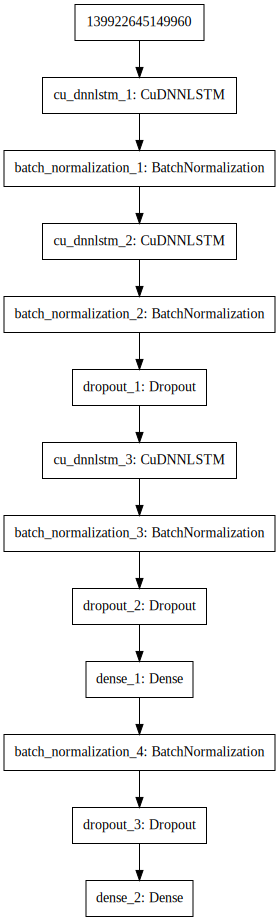

In [0]:
# Plot model and save to file
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='model_v4a.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Epoch 1/1
2077/2077 [==============================] - 6s 3ms/step - loss: 0.7629 - mean_squared_error: 0.7629


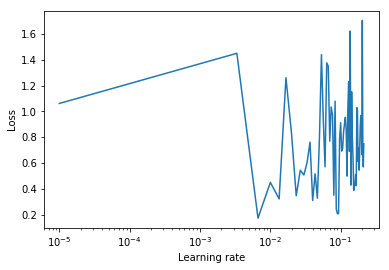

In [0]:
# find learning rate first
epoch_size = 20
batch_size = 256

lr_finder = LRFinder(min_lr=1e-5, 
                     max_lr=1e-2, 
                     steps_per_epoch=np.ceil(epoch_size/batch_size), 
                     epochs=3)
model.fit(X_train, y_train, callbacks=[lr_finder])

lr_finder.plot_loss()

### Fit

In [0]:
model.fit(X_train, y_train, epochs=10, batch_size=128,  validation_split=0.1, verbose=2)

Train on 1855 samples, validate on 207 samples
Epoch 1/10
 - 5s - loss: 0.3629 - mean_squared_error: 0.3629 - val_loss: 0.2672 - val_mean_squared_error: 0.2672
Epoch 2/10
 - 0s - loss: 0.2740 - mean_squared_error: 0.2740 - val_loss: 0.2401 - val_mean_squared_error: 0.2401
Epoch 3/10
 - 0s - loss: 0.2454 - mean_squared_error: 0.2454 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 4/10
 - 0s - loss: 0.2450 - mean_squared_error: 0.2450 - val_loss: 0.2213 - val_mean_squared_error: 0.2213
Epoch 5/10
 - 0s - loss: 0.2263 - mean_squared_error: 0.2263 - val_loss: 0.1919 - val_mean_squared_error: 0.1919
Epoch 6/10
 - 0s - loss: 0.2237 - mean_squared_error: 0.2237 - val_loss: 0.1950 - val_mean_squared_error: 0.1950
Epoch 7/10
 - 0s - loss: 0.2162 - mean_squared_error: 0.2162 - val_loss: 0.1806 - val_mean_squared_error: 0.1806
Epoch 8/10
 - 0s - loss: 0.2092 - mean_squared_error: 0.2092 - val_loss: 0.1841 - val_mean_squared_error: 0.1841
Epoch 9/10
 - 0s - loss: 0.1920 - mean_squared_er

In [0]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train RMSE: %2f' % math.sqrt(trainScore[0]))

testScore = model.evaluate(X_val, y_val, verbose=0)
print('Test RMSE: %2f'% math.sqrt(testScore[0]))

Train RMSE: 0.382031
Test RMSE: 0.479963


In [0]:
p = model.predict(X_val)
print("length of predict matrix {}".format(len(p)))

length of predict matrix 157


In [0]:
padding = np.zeros((157, 8))
pred_result = pd.DataFrame(data=padding)
pred_result['9'] = p
pred = prescaler.inverse_transform(pred_result)

val_result = pd.DataFrame(data=padding)
val_result['9'] = y_val
val = prescaler.inverse_transform(val_result)



pred = pred[:, -1]
val = val[:, -1]


In [0]:
pred

In [0]:
val

In [0]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rmse = math.sqrt(mean_squared_error(val, pred))
mape = get_mape(val, pred)

# Calculate RMSE
print("RMSE on test set = %0.3f" % rmse)

# Calculate MAPE
print("MAPE on test set = %0.3f%%" % mape)

RMSE on test set = 9.856
MAPE on test set = 4.081%


Text(0.5, 1.0, 'Zoom in to test set')

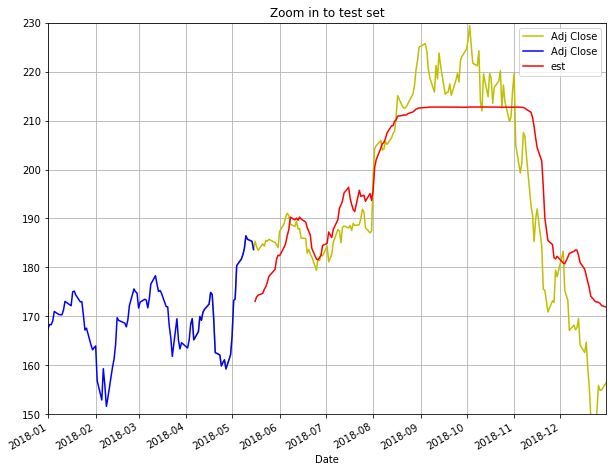

In [0]:
# Plot adjusted close over time
plt.rcParams["figure.figsize"] = (10,8) # width 10, height 8

est_df = pd.DataFrame({'est': pred, 
                       'Date': df_train[(df_train.index >= last_5pct)].index})




ax = validation_main_df.reset_index().plot(x='index', y='Adj Close', style='y-', grid=True)
ax = main_df.reset_index().plot(x='index', y='Adj Close', style='b-', grid=True, ax=ax)
#ax = test.plot(x='Date', y='Adj Close', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='Date', y='est', style='r-', grid=True, ax=ax)
#ax.legend(['train', 'dev', 'test', 'predictions'])
#ax.set_xlabel("date")
#ax.set_ylabel("AAPL")
ax.set_xlim([date(2018, 1, 1), date(2018, 12, 31)]) #2017-08-25 2018-12-31
ax.set_ylim([150, 230])
ax.set_title("Zoom in to test set")

## Create GRU-LSTM

In [0]:
def build_model(opt):
    model = Sequential()
    model.add(GRU(128, input_shape=(X_train.shape[1:]), return_sequences=True))
#    model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.

#     model.add(CuDNNLSTM(128, return_sequences=True))
#     model.add(BatchNormalization())
    model.add(Dropout(1))
    
    model.add(GRU(64))
#    model.add(BatchNormalization())
    model.add(Dropout(1))

#     model.add(Dense(32, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.2))

#     model.add(Dense(1, activation='tanh'))
    model.add(Dense(1))
    
    model.compile(loss='mse',optimizer=opt, metrics=['mse'])
    return model



In [0]:
#opt = optimizers.RMSprop(lr=7e-3)
opt = 'adam' 

model_GRU = build_model(opt)
# Print model summary
model_GRU.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_14 (GRU)                 (None, 31, 128)           52608     
_________________________________________________________________
dropout_49 (Dropout)         (None, 31, 128)           0         
_________________________________________________________________
gru_15 (GRU)                 (None, 64)                37056     
_________________________________________________________________
dropout_50 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 65        
Total params: 89,729
Trainable params: 89,729
Non-trainable params: 0
_________________________________________________________________


### Fit

In [0]:
model.fit(X_train, y_train, epochs=10, batch_size=128,  validation_split=0.1, verbose=2)

Train on 1855 samples, validate on 207 samples
Epoch 1/10
 - 3s - loss: 0.1366 - mean_squared_error: 0.1366 - val_loss: 0.1376 - val_mean_squared_error: 0.1376
Epoch 2/10
 - 0s - loss: 0.1336 - mean_squared_error: 0.1336 - val_loss: 0.1377 - val_mean_squared_error: 0.1377
Epoch 3/10
 - 0s - loss: 0.1336 - mean_squared_error: 0.1336 - val_loss: 0.1377 - val_mean_squared_error: 0.1377
Epoch 4/10
 - 0s - loss: 0.1358 - mean_squared_error: 0.1358 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 5/10
 - 0s - loss: 0.1374 - mean_squared_error: 0.1374 - val_loss: 0.1374 - val_mean_squared_error: 0.1374
Epoch 6/10
 - 0s - loss: 0.1381 - mean_squared_error: 0.1381 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 7/10
 - 0s - loss: 0.1365 - mean_squared_error: 0.1365 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 8/10
 - 0s - loss: 0.1347 - mean_squared_error: 0.1347 - val_loss: 0.1385 - val_mean_squared_error: 0.1385
Epoch 9/10
 - 0s - loss: 0.1358 - mean_squared_er

In [0]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train RMSE: %2f' % math.sqrt(trainScore[0]))

testScore = model.evaluate(X_val, y_val, verbose=0)
print('Test RMSE: %2f'% math.sqrt(testScore[0]))

Train RMSE: 0.352536
Test RMSE: 0.494500


In [0]:
p = model.predict(X_val)
print("length of predict matrix {}".format(len(p)))

length of predict matrix 157


In [0]:
padding = np.zeros((157, 8))
pred_result = pd.DataFrame(data=padding)
pred_result['9'] = p
pred = prescaler.inverse_transform(pred_result)

val_result = pd.DataFrame(data=padding)
val_result['9'] = y_val
val = prescaler.inverse_transform(val_result)



pred = pred[:, -1]
val = val[:, -1]


In [0]:
pred

In [0]:
val

In [0]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rmse = math.sqrt(mean_squared_error(val, pred))
mape = get_mape(val, pred)

# Calculate RMSE
print("RMSE on test set = %0.3f" % rmse)

# Calculate MAPE
print("MAPE on test set = %0.3f%%" % mape)

RMSE on test set = 10.154
MAPE on test set = 4.389%


Text(0.5, 1.0, 'Zoom in to test set')

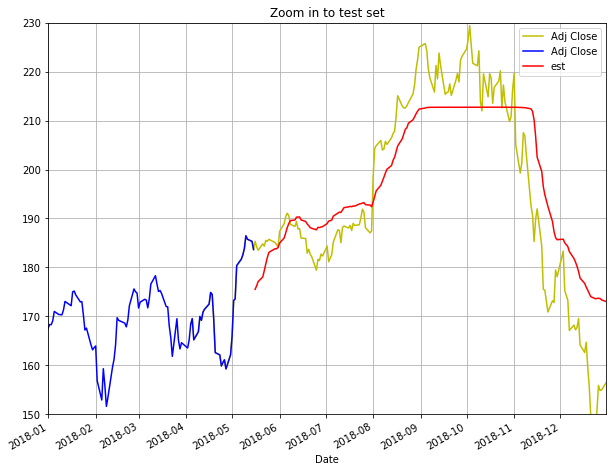

In [0]:
# Plot adjusted close over time
plt.rcParams["figure.figsize"] = (10,8) # width 10, height 8

est_df = pd.DataFrame({'est': pred, 
                       'Date': df_train[(df_train.index >= last_5pct)].index})




ax = validation_main_df.reset_index().plot(x='index', y='Adj Close', style='y-', grid=True)
ax = main_df.reset_index().plot(x='index', y='Adj Close', style='b-', grid=True, ax=ax)
#ax = test.plot(x='Date', y='Adj Close', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='Date', y='est', style='r-', grid=True, ax=ax)
#ax.legend(['train', 'dev', 'test', 'predictions'])
#ax.set_xlabel("date")
#ax.set_ylabel("AAPL")
ax.set_xlim([date(2018, 1, 1), date(2018, 12, 31)]) #2017-08-25 2018-12-31
ax.set_ylim([150, 230])
ax.set_title("Zoom in to test set")

# Modelling return

In [0]:
%matplotlib inline

import time
from datetime import date
import seaborn as sns
from matplotlib import pyplot as plt

import math
import numpy as np
import pandas as pd
import random
from numpy.random import seed

from tqdm import tqdm_notebook
from collections import deque

from sklearn.metrics import mean_squared_error
# make your loops show a smart progress meter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


#import tensorflow as tf
from tensorflow import set_random_seed
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, BatchNormalization
from keras.utils import plot_model
from keras.callbacks import Callback
import keras.backend as K

Using TensorFlow backend.


In [0]:
df_fitting = pd.read_hdf(data_dir + "df_fitting_v2.h5", "data")
df_fitting.drop(['News'], axis=1, inplace=True)
print(df_fitting.shape[0])
df_fitting.tail()

2374


,Volume,Adj Close,MACD,stochastics,ATR,nltk_neg,nltk_neu,nltk_pos,textblob_sen,textblob_sub
2019-06-25,21070300.0,195.570007,2.443034,72.682599,3.970001,0.117,0.800,0.083,0.003461,0.449327
2019-06-26,26067500.0,199.800003,2.380348,100.000000,5.419998,0.122,0.764,0.114,0.123429,0.428687
2019-06-27,20899700.0,199.740005,2.252362,99.169009,2.000000,0.109,0.796,0.095,0.061306,0.412898
2019-06-28,31110600.0,197.919998,1.953487,73.371026,2.690002,0.085,0.804,0.111,0.138935,0.384344
2019-07-01,27316700.0,201.550003,1.932708,100.000000,6.570007,0.084,0.854,0.063,0.182029,0.394108


In [0]:
# log 1 days returns
df_fitting['lrets'] = np.log(df_fitting['Adj Close']/df_fitting['Adj Close'].shift(1))
df_fitting.dropna(inplace=True, axis=0)

df_fitting['Y'] = df_fitting.lrets.shift(-1)
df_fitting.dropna(axis=0, inplace=True)

print(df_fitting.shape[0])

2372


In [0]:
'''
Function to preprocess data for training NN
  data: input dataframe
  N: number of previous day that you want to get for estimating y_future
  shuffle = True (default), choose to randomly suffle the data for better result

'''
def preprocess_df(data, N, shuffle=True):
    preprocess_data = data.copy()
    
#     scaler = RobustScaler()
#     preprocess_data = scaler.fit_transform(preprocess_data)    
    
    scaler = StandardScaler()
    preprocess_data = scaler.fit_transform(preprocess_data)    

    sequential_data = []  # this is a list that will CONTAIN the sequences
    # These will be our actual sequences. 
    # They are made with deque, which keeps the maximum length by popping out older values as new ones come in
    prev_days = deque(maxlen = N)  

    for i in preprocess_data:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target

        # if prev_days have 60 days of data
        if len(prev_days) == N:
            # sequential_data = [prev_days_data, target variable]
            sequential_data.append([np.array(prev_days), i[-1]])  
    if shuffle == True:
        random.shuffle(sequential_data)  # shuffle for good measure.

    X = []
    y = []

    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)
    
    del preprocess_data 
    
    if shuffle == True:
        return np.array(X), np.array(y) 
    else:
        return np.array(X), np.array(y), sequential_data, scaler

In [0]:
df_train = df_fitting[df_fitting.index < '2019-01-01']
df_test = df_fitting[df_fitting.index >= '2019-01-01']

## v1

In [0]:
df_train.tail()

,Volume,Adj Close,MACD,stochastics,ATR,nltk_neg,nltk_neu,nltk_pos,textblob_sen,textblob_sub,lrets,Y
2018-12-24,37169200.0,145.642090,-1.676384,0.000000,4.960007,0.103,0.812,0.085,0.132691,0.505045,-0.026215,0.068053
2018-12-26,58582500.0,155.898438,-1.166758,37.074196,10.509995,0.071,0.835,0.094,0.156570,0.421532,0.068053,-0.006511
2018-12-27,53117100.0,154.886688,-0.752747,38.640127,7.099991,0.102,0.782,0.115,0.079782,0.408689,-0.006511,0.000512
2018-12-28,42291400.0,154.966034,-0.340175,38.971772,3.970001,0.108,0.796,0.096,0.065223,0.465528,0.000512,0.009619
2018-12-31,35003500.0,156.463837,0.160444,45.232216,3.130005,0.112,0.813,0.075,0.072823,0.461189,0.009619,0.001140


In [0]:
len(df_train)

2248

In [0]:
N = 30
slipt_ratio = 0.07

times = sorted(df_train.index.values)
last_5pct = sorted(df_train.index.values)[-int(slipt_ratio*len(times))]
val_last_5pct = sorted(df_train.index.values)[-int(slipt_ratio*len(times)+N)]

validation_main_df = df_train[(df_train.index >= val_last_5pct)]
#validation_main_df = df_train[(df_train.index >= last_5pct)]
main_df = df_train[(df_train.index < last_5pct)]

In [0]:
print("main_df shape: {}".format(main_df.shape))
print("validation main_df shape: {}".format(validation_main_df.shape))
print("real validation range: {}, {}".format(validation_main_df.shape[0]-N,validation_main_df.shape[1]))

main_df shape: (2091, 12)
validation main_df shape: (187, 12)
real validation range: 157, 12


In [0]:
X_train, y_train = preprocess_df(main_df, N = 31,shuffle=True)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (2061, 31, 11)
y_train shape: (2061,)


In [0]:
validation_main_df.shape

(187, 12)

In [0]:
X_val, y_val, scaled_data, prescaler = preprocess_df(validation_main_df, N = 31, shuffle=False)
print('X_val shape: {}'.format(X_val.shape))
print('y_val shape: {}'.format(y_val.shape))

X_val shape: (157, 31, 11)
y_val shape: (157,)


### customed function

In [0]:
class LRFinder(Callback):
    
    '''
    A simple callback for finding the optimal learning rate range for your model + dataset. 
    
    # Usage
        ```python
            lr_finder = LRFinder(min_lr=1e-5, 
                                 max_lr=1e-2, 
                                 steps_per_epoch=np.ceil(epoch_size/batch_size), 
                                 epochs=3)
            model.fit(X_train, Y_train, callbacks=[lr_finder])
            
            lr_finder.plot_loss()
        ```
    
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        epochs: Number of epochs to run experiment. Usually between 2 and 4 epochs is sufficient. 
        
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: https://arxiv.org/abs/1506.01186
    '''
    
    def __init__(self, min_lr=1e-5, max_lr=1e-2, steps_per_epoch=None, epochs=None):
        super().__init__()
        
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.total_iterations = steps_per_epoch * epochs
        self.iteration = 0
        self.history = {}
        
    def clr(self):
        '''Calculate the learning rate.'''
        x = self.iteration / self.total_iterations 
        return self.min_lr + (self.max_lr-self.min_lr) * x
        
    def on_train_begin(self, logs=None):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.min_lr)
        
    def on_batch_end(self, epoch, logs=None):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.iteration += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.iteration)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
            
        K.set_value(self.model.optimizer.lr, self.clr())
 
    def plot_lr(self):
        '''Helper function to quickly inspect the learning rate schedule.'''
        plt.plot(self.history['iterations'], self.history['lr'])
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Learning rate')
        
    def plot_loss(self):
        '''Helper function to quickly observe the learning rate experiment results.'''
        plt.plot(self.history['lr'], self.history['loss'])
        plt.xscale('log')
        plt.xlabel('Learning rate')
        plt.ylabel('Loss')

### Create CuDNNLSTM

In [0]:
def build_model(opt):
    model = Sequential()
    model.add(CuDNNLSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
    model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.

#     model.add(CuDNNLSTM(128, return_sequences=True))
#     model.add(BatchNormalization())
    model.add(Dropout(0.1))
    
    model.add(CuDNNLSTM(64))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='tanh'))
    
    
    model.compile(loss='mse',optimizer=opt, metrics=['mse'])
    return model



In [0]:
#opt = optimizers.RMSprop(lr=7e-3)
opt = 'adam' 

model1 = build_model(opt)
# Print model summary
model1.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_23 (CuDNNLSTM)    (None, 31, 128)           72192     
_________________________________________________________________
batch_normalization_31 (Batc (None, 31, 128)           512       
_________________________________________________________________
dropout_24 (Dropout)         (None, 31, 128)           0         
_________________________________________________________________
cu_dnnlstm_24 (CuDNNLSTM)    (None, 64)                49664     
_________________________________________________________________
batch_normalization_32 (Batc (None, 64)                256       
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)               

In [0]:
# Plot model and save to file
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='model_v4a.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Fit

In [0]:
model1.fit(X_train, y_train, epochs=10, batch_size=128,  validation_split=0.1, verbose=2)

Train on 1854 samples, validate on 207 samples
Epoch 1/10
1854/1854 - 2s - loss: 1.5381 - mean_squared_error: 1.5381 - val_loss: 0.9161 - val_mean_squared_error: 0.9161
Epoch 2/10
1854/1854 - 0s - loss: 1.3687 - mean_squared_error: 1.3687 - val_loss: 0.9072 - val_mean_squared_error: 0.9072
Epoch 3/10
1854/1854 - 0s - loss: 1.2556 - mean_squared_error: 1.2556 - val_loss: 0.8935 - val_mean_squared_error: 0.8935
Epoch 4/10
1854/1854 - 0s - loss: 1.2139 - mean_squared_error: 1.2139 - val_loss: 0.8935 - val_mean_squared_error: 0.8935
Epoch 5/10
1854/1854 - 0s - loss: 1.1917 - mean_squared_error: 1.1917 - val_loss: 0.8974 - val_mean_squared_error: 0.8974
Epoch 6/10
1854/1854 - 0s - loss: 1.1278 - mean_squared_error: 1.1278 - val_loss: 0.9168 - val_mean_squared_error: 0.9168
Epoch 7/10
1854/1854 - 0s - loss: 1.1406 - mean_squared_error: 1.1406 - val_loss: 0.9304 - val_mean_squared_error: 0.9304
Epoch 8/10
1854/1854 - 0s - loss: 1.1175 - mean_squared_error: 1.1175 - val_loss: 0.9259 - val_mean

In [0]:
trainScore = model1.evaluate(X_train, y_train, verbose=0)
print('Train RMSE: %2f' % math.sqrt(trainScore[0]))

testScore = model.evaluate(X_val, y_val, verbose=0)
print('Test RMSE: %2f'% math.sqrt(testScore[0]))

Train RMSE: 0.998614
Test RMSE: 1.024336


In [0]:
p = model1.predict(X_val)
print("length of predict matrix {}".format(len(p)))

length of predict matrix 157


In [0]:
padding = np.zeros((157, 11))
pred_result = pd.DataFrame(data=padding)
pred_result['12'] = p
pred = prescaler.inverse_transform(pred_result)

val_result = pd.DataFrame(data=padding)
val_result['12'] = y_val
val = prescaler.inverse_transform(val_result)



pred = pred[:, -1]
val = val[:, -1]


In [0]:
pred

In [0]:
val

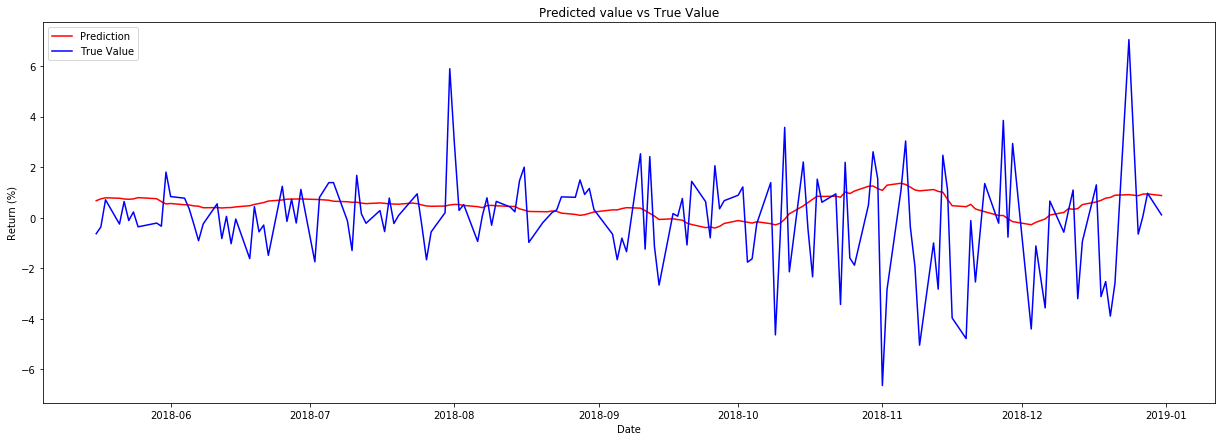

In [0]:
plt.figure(figsize=(21,7))
plt.plot(df_train.index[-len(pred):], np.expm1(pred)*100, color='red', label='Prediction')
plt.plot(df_train.index[-len(val):], np.expm1(val)*100, color='blue', label='True Value')
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.title('Predicted value vs True Value')
plt.legend(loc='best')
plt.show()

In [0]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rmse = math.sqrt(mean_squared_error(val, pred))
mape = get_mape(val, pred)

# Calculate RMSE
print("RMSE on test set = %0.3f" % rmse)

# Calculate MAPE
print("MAPE on test set = %0.3f%%" % mape)

RMSE on test set = 0.020
MAPE on test set = 192.240%


### Create GRU-LSTM

In [0]:
def build_model(opt):
    model = Sequential()
    model.add(GRU(128, input_shape=(X_train.shape[1:]), return_sequences=True))
#    model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.

#     model.add(CuDNNLSTM(128, return_sequences=True))
#     model.add(BatchNormalization())
    model.add(Dropout(1))
    
    model.add(GRU(64))
#    model.add(BatchNormalization())
    model.add(Dropout(1))

#     model.add(Dense(32, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.2))

#     model.add(Dense(1, activation='tanh'))
    model.add(Dense(1))
    
    model.compile(loss='mse',optimizer=opt, metrics=['mse'])
    return model



In [0]:
#opt = optimizers.RMSprop(lr=7e-3)
opt = 'adam' 

model_GRU = build_model(opt)
# Print model summary
model_GRU.summary()


NameError: ignored

### Fit

In [0]:
model.fit(X_train, y_train, epochs=10, batch_size=128,  validation_split=0.1, verbose=2)

Train on 1855 samples, validate on 207 samples
Epoch 1/10
 - 3s - loss: 0.1366 - mean_squared_error: 0.1366 - val_loss: 0.1376 - val_mean_squared_error: 0.1376
Epoch 2/10
 - 0s - loss: 0.1336 - mean_squared_error: 0.1336 - val_loss: 0.1377 - val_mean_squared_error: 0.1377
Epoch 3/10
 - 0s - loss: 0.1336 - mean_squared_error: 0.1336 - val_loss: 0.1377 - val_mean_squared_error: 0.1377
Epoch 4/10
 - 0s - loss: 0.1358 - mean_squared_error: 0.1358 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 5/10
 - 0s - loss: 0.1374 - mean_squared_error: 0.1374 - val_loss: 0.1374 - val_mean_squared_error: 0.1374
Epoch 6/10
 - 0s - loss: 0.1381 - mean_squared_error: 0.1381 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 7/10
 - 0s - loss: 0.1365 - mean_squared_error: 0.1365 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 8/10
 - 0s - loss: 0.1347 - mean_squared_error: 0.1347 - val_loss: 0.1385 - val_mean_squared_error: 0.1385
Epoch 9/10
 - 0s - loss: 0.1358 - mean_squared_er

In [0]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train RMSE: %2f' % math.sqrt(trainScore[0]))

testScore = model.evaluate(X_val, y_val, verbose=0)
print('Test RMSE: %2f'% math.sqrt(testScore[0]))

Train RMSE: 0.352536
Test RMSE: 0.494500


In [0]:
p = model.predict(X_val)
print("length of predict matrix {}".format(len(p)))

length of predict matrix 157


In [0]:
padding = np.zeros((157, 8))
pred_result = pd.DataFrame(data=padding)
pred_result['9'] = p
pred = prescaler.inverse_transform(pred_result)

val_result = pd.DataFrame(data=padding)
val_result['9'] = y_val
val = prescaler.inverse_transform(val_result)



pred = pred[:, -1]
val = val[:, -1]


In [0]:
pred

In [0]:
val

In [0]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rmse = math.sqrt(mean_squared_error(val, pred))
mape = get_mape(val, pred)

# Calculate RMSE
print("RMSE on test set = %0.3f" % rmse)

# Calculate MAPE
print("MAPE on test set = %0.3f%%" % mape)

RMSE on test set = 10.154
MAPE on test set = 4.389%


Text(0.5, 1.0, 'Zoom in to test set')

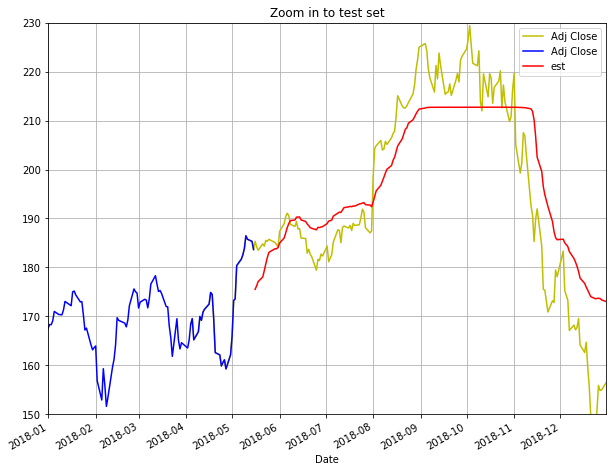

In [0]:
# Plot adjusted close over time
plt.rcParams["figure.figsize"] = (10,8) # width 10, height 8

est_df = pd.DataFrame({'est': pred, 
                       'Date': df_train[(df_train.index >= last_5pct)].index})




ax = validation_main_df.reset_index().plot(x='index', y='Adj Close', style='y-', grid=True)
ax = main_df.reset_index().plot(x='index', y='Adj Close', style='b-', grid=True, ax=ax)
#ax = test.plot(x='Date', y='Adj Close', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='Date', y='est', style='r-', grid=True, ax=ax)
#ax.legend(['train', 'dev', 'test', 'predictions'])
#ax.set_xlabel("date")
#ax.set_ylabel("AAPL")
ax.set_xlim([date(2018, 1, 1), date(2018, 12, 31)]) #2017-08-25 2018-12-31
ax.set_ylim([150, 230])
ax.set_title("Zoom in to test set")

In [0]:
df_final

In [0]:
df_final

## v2

In [0]:
import pandas as pd
import numpy as np
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.backend as K

import math
from sklearn.preprocessing import RobustScaler
from collections import deque

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
data = df_train.copy()

In [0]:
'''
Function to preprocess data for training NN
  data: input dataframe
  N: number of previous day that you want to get for estimating y_future
  shuffle = True (default), choose to randomly suffle the data for better result

'''
def preprocess_df(data, N, shuffle=True):
    preprocess_data = data.copy()
    
#     scaler = RobustScaler()
#     preprocess_data = scaler.fit_transform(preprocess_data)    
    
    scaler = StandardScaler()
    preprocess_data = scaler.fit_transform(preprocess_data)    

    sequential_data = []  # this is a list that will CONTAIN the sequences
    # These will be our actual sequences. 
    # They are made with deque, which keeps the maximum length by popping out older values as new ones come in
    prev_days = deque(maxlen = N)  

    for i in preprocess_data:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target

        # if prev_days have 60 days of data
        if len(prev_days) == N:
            # sequential_data = [prev_days_data, target variable]
            sequential_data.append([np.array(prev_days), i[-1]])  
    if shuffle == True:
        random.shuffle(sequential_data)  # shuffle for good measure.

    X = []
    y = []

    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)
    
    del preprocess_data 
    
    if shuffle == True:
        return np.array(X), np.array(y) 
    else:
        return np.array(X), np.array(y), sequential_data, scaler

In [0]:
N = 30
slipt_ratio = 0.07

times = sorted(data.index.values)
last_5pct = sorted(data.index.values)[-int(slipt_ratio*len(times))]
val_last_5pct = sorted(data.index.values)[-int(slipt_ratio*len(times)+N)]

validation_main_df = data[(data.index >= val_last_5pct)]
#validation_main_df = df_train[(df_train.index >= last_5pct)]
main_df = data[(data.index < last_5pct)]

In [0]:
print("main_df shape: {}".format(main_df.shape))
print("validation main_df shape: {}".format(validation_main_df.shape))
print("real validation range: {}, {}".format(validation_main_df.shape[0]-N,validation_main_df.shape[1]))

main_df shape: (2091, 12)
validation main_df shape: (187, 12)
real validation range: 157, 12


In [0]:
X_train, y_train = preprocess_df(main_df, N = 31,shuffle=True)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (2061, 31, 11)
y_train shape: (2061,)


In [0]:
X_val, y_val, scaled_data, prescaler = preprocess_df(validation_main_df, N = 31, shuffle=False)
print('X_val shape: {}'.format(X_val.shape))
print('y_val shape: {}'.format(y_val.shape))

X_val shape: (157, 31, 11)
y_val shape: (157,)


In [0]:
class SGDRScheduler(Callback):
    '''Cosine annealing learning rate scheduler with periodic restarts.
    # Usage
        ```python
            schedule = SGDRScheduler(min_lr=1e-5,
                                     max_lr=1e-2,
                                     steps_per_epoch=np.ceil(epoch_size/batch_size),
                                     lr_decay=0.9,
                                     cycle_length=5,
                                     mult_factor=1.5)
            model.fit(X_train, Y_train, epochs=100, callbacks=[schedule])
        ```
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        lr_decay: Reduce the max_lr after the completion of each cycle.
                  Ex. To reduce the max_lr by 20% after each cycle, set this value to 0.8.
        cycle_length: Initial number of epochs in a cycle.
        mult_factor: Scale epochs_to_restart after each full cycle completion.
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: http://arxiv.org/abs/1608.03983
    '''
    def __init__(self,
                 min_lr,
                 max_lr,
                 steps_per_epoch,
                 lr_decay=1,
                 cycle_length=10,
                 mult_factor=2):

        self.min_lr = min_lr
        self.max_lr = max_lr
        self.lr_decay = lr_decay

        self.batch_since_restart = 0
        self.next_restart = cycle_length

        self.steps_per_epoch = steps_per_epoch

        self.cycle_length = cycle_length
        self.mult_factor = mult_factor

        self.history = {}

    def clr(self):
        '''Calculate the learning rate.'''
        fraction_to_restart = self.batch_since_restart / (self.steps_per_epoch * self.cycle_length)
        lr = self.min_lr + 0.5 * (self.max_lr - self.min_lr) * (1 + np.cos(fraction_to_restart * np.pi))
        return lr

    def on_train_begin(self, logs={}):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.max_lr)

    def on_batch_end(self, batch, logs={}):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)

        self.batch_since_restart += 1
        K.set_value(self.model.optimizer.lr, self.clr())

    def on_epoch_end(self, epoch, logs={}):
        '''Check for end of current cycle, apply restarts when necessary.'''
        if epoch + 1 == self.next_restart:
            self.batch_since_restart = 0
            self.cycle_length = np.ceil(self.cycle_length * self.mult_factor)
            self.next_restart += self.cycle_length
            self.max_lr *= self.lr_decay
            self.best_weights = self.model.get_weights()

    def on_train_end(self, logs={}):
        '''Set weights to the values from the end of the most recent cycle for best performance.'''
        self.model.set_weights(self.best_weights)

In [0]:
class LRFinder(Callback):
    
    '''
    A simple callback for finding the optimal learning rate range for your model + dataset. 
    
    # Usage
        ```python
            lr_finder = LRFinder(min_lr=1e-5, 
                                 max_lr=1e-2, 
                                 steps_per_epoch=np.ceil(epoch_size/batch_size), 
                                 epochs=3)
            model.fit(X_train, Y_train, callbacks=[lr_finder])
            
            lr_finder.plot_loss()
        ```
    
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        epochs: Number of epochs to run experiment. Usually between 2 and 4 epochs is sufficient. 
        
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: https://arxiv.org/abs/1506.01186
    '''
    
    def __init__(self, min_lr=1e-5, max_lr=1e-2, steps_per_epoch=None, epochs=None):
        super().__init__()
        
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.total_iterations = steps_per_epoch * epochs
        self.iteration = 0
        self.history = {}
        
    def clr(self):
        '''Calculate the learning rate.'''
        x = self.iteration / self.total_iterations 
        return self.min_lr + (self.max_lr-self.min_lr) * x
        
    def on_train_begin(self, logs=None):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.min_lr)
        
    def on_batch_end(self, epoch, logs=None):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.iteration += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.iteration)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
            
        K.set_value(self.model.optimizer.lr, self.clr())
 
    def plot_lr(self):
        '''Helper function to quickly inspect the learning rate schedule.'''
        plt.plot(self.history['iterations'], self.history['lr'])
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Learning rate')
        
    def plot_loss(self):
        '''Helper function to quickly observe the learning rate experiment results.'''
        plt.plot(self.history['lr'], self.history['loss'])
        plt.xscale('log')
        plt.xlabel('Learning rate')
        plt.ylabel('Loss')

In [0]:
def build_model():
    model = Sequential()
    model.add(CuDNNLSTM(256, input_shape=(X_train.shape[1:]), return_sequences=True))
    model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.

    model.add(CuDNNLSTM(128, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    
    model.add(CuDNNLSTM(64))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='tanh'))
    
    opt = tf.keras.optimizers.RMSprop(lr=7e-3)
    model.compile(loss='mse',optimizer=opt, metrics=['mse'])
    return model

In [0]:
model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_9 (CuDNNLSTM)     (None, 31, 256)           275456    
_________________________________________________________________
batch_normalization_12 (Batc (None, 31, 256)           1024      
_________________________________________________________________
cu_dnnlstm_10 (CuDNNLSTM)    (None, 31, 128)           197632    
_________________________________________________________________
batch_normalization_13 (Batc (None, 31, 128)           512       
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 128)           0         
_________________________________________________________________
cu_dnnlstm_11 (CuDNNLSTM)    (None, 64)                49664     
_________________________________________________________________
batch_normalization_14 (Batc (None, 64)               

2061/2061 [==============================] - 2s 915us/sample - loss: 1.3711 - mean_squared_error: 1.3711


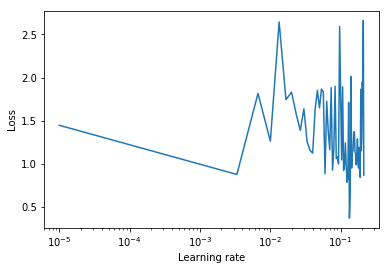

In [0]:


# find learning rate first
epoch_size = 20
batch_size = 256

lr_finder = LRFinder(min_lr=1e-5, 
                     max_lr=1e-2, 
                     steps_per_epoch=np.ceil(epoch_size/batch_size), 
                     epochs=3)
model.fit(X_train, y_train, callbacks=[lr_finder])

lr_finder.plot_loss()



In [0]:
model = build_model()
schedule = SGDRScheduler(min_lr=1e-3,
                         max_lr=1e-2,
                         steps_per_epoch=np.ceil(epoch_size/batch_size),
                         lr_decay=0.9,
                         cycle_length= 3,
                         mult_factor=1.5)

model.fit(
    X_train,
    y_train,
    epochs=20, 
    callbacks=[schedule],
    validation_split=0.1,
    verbose=1)

Train on 1854 samples, validate on 207 samples
Epoch 1/20
1854/1854 [==============================] - 3s 1ms/sample - loss: 1.3362 - mean_squared_error: 1.3362 - val_loss: 1.1674 - val_mean_squared_error: 1.1674
Epoch 2/20
1854/1854 [==============================] - 1s 476us/sample - loss: 1.2154 - mean_squared_error: 1.2154 - val_loss: 1.0913 - val_mean_squared_error: 1.0913
Epoch 3/20
1854/1854 [==============================] - 1s 580us/sample - loss: 1.1455 - mean_squared_error: 1.1455 - val_loss: 1.0808 - val_mean_squared_error: 1.0808
Epoch 4/20
1854/1854 [==============================] - 1s 480us/sample - loss: 1.0633 - mean_squared_error: 1.0633 - val_loss: 1.1199 - val_mean_squared_error: 1.1199
Epoch 5/20
1854/1854 [==============================] - 1s 471us/sample - loss: 1.0291 - mean_squared_error: 1.0291 - val_loss: 1.0805 - val_mean_squared_error: 1.0805
Epoch 6/20
1854/1854 [==============================] - 1s 468us/sample - loss: 1.0072 - mean_squared_error: 1.0072

In [0]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train RMSE: %2f' % math.sqrt(trainScore[0]))

testScore = model.evaluate(X_val, y_val, verbose=0)
print('Test RMSE: %2f'% math.sqrt(testScore[0]))

Train RMSE: 1.000281
Test RMSE: 1.004788


In [0]:
p = model.predict(X_val)



In [0]:
len(p)

157

In [0]:
padding = np.zeros((157, 11))
pred_result = pd.DataFrame(data=padding)
pred_result['12'] = p
pred = prescaler.inverse_transform(pred_result)

val_result = pd.DataFrame(data=padding)
val_result['12'] = y_val
val = prescaler.inverse_transform(val_result)

In [0]:
pred = pred[:, -1]
val = val[:, -1]

In [0]:
pred

In [0]:
val

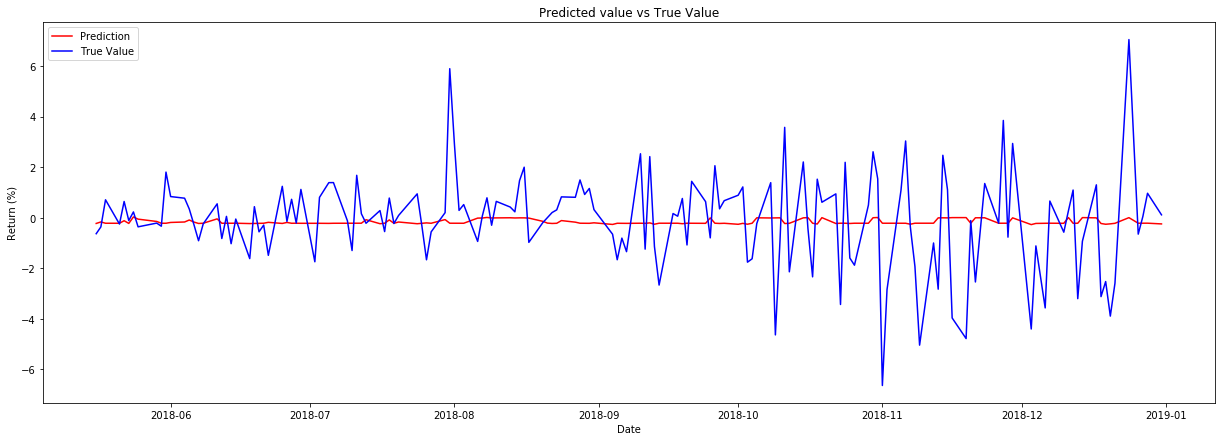

In [0]:
plt.figure(figsize=(21,7))
plt.plot(data.index[-len(pred):], np.expm1(pred)*100, color='red', label='Prediction')
plt.plot(data.index[-len(val):], np.expm1(val)*100, color='blue', label='True Value')
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.title('Predicted value vs True Value')
plt.legend(loc='best')
plt.show()

((array([-2.61932342, -2.3011455 , -2.11897341, -1.98808743, -1.88439676,
         -1.79772477, -1.72277103, -1.65640788, -1.59662845, -1.54206475,
         -1.49174058, -1.44493383, -1.40109463, -1.35979412, -1.32069108,
         -1.28350932, -1.24802199, -1.21404037, -1.18140564, -1.14998288,
         -1.11965636, -1.09032607, -1.06190494, -1.03431666, -1.00749397,
         -0.98137721, -0.95591324, -0.9310545 , -0.9067582 , -0.88298572,
         -0.85970207, -0.83687542, -0.81447672, -0.79247938, -0.77085899,
         -0.74959307, -0.72866087, -0.70804319, -0.68772219, -0.6676813 ,
         -0.64790506, -0.62837904, -0.60908972, -0.59002442, -0.57117122,
         -0.5525189 , -0.53405686, -0.51577509, -0.49766411, -0.47971492,
         -0.46191898, -0.44426815, -0.42675466, -0.40937111, -0.3921104 ,
         -0.37496573, -0.35793059, -0.34099869, -0.324164  , -0.30742069,
         -0.29076313, -0.27418586, -0.25768361, -0.24125123, -0.22488375,
         -0.2085763 , -0.19232412, -0.

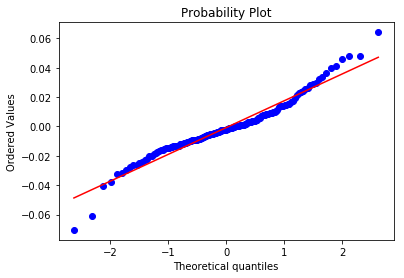

In [0]:
import scipy.stats as stats
residual = np.expm1(pred) - np.expm1(val)
stats.probplot(residual, dist="norm", plot=plt)

# Modelling return

In [1]:
%matplotlib inline

import time
from datetime import date
import seaborn as sns
from matplotlib import pyplot as plt

import math
import numpy as np
import pandas as pd
import random
from numpy.random import seed

from tqdm import tqdm_notebook
from collections import deque

from sklearn.metrics import mean_squared_error
# make your loops show a smart progress meter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


#import tensorflow as tf
from tensorflow import set_random_seed
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, LSTM, CuDNNLSTM, BatchNormalization
from keras.utils import plot_model
from keras.callbacks import Callback
import keras.backend as K

Using TensorFlow backend.


In [188]:
data_dir = "drive/My Drive/DS/HasBrain-PracticalML/data/"

df = pd.read_hdf(data_dir + "df_fitting_v2.h5", "data")
df.drop(['News'], axis=1, inplace=True)
print(df.shape[0])
df.tail()

2374


,Volume,Adj Close,MACD,stochastics,ATR,nltk_neg,nltk_neu,nltk_pos,textblob_sen,textblob_sub
2019-06-25,21070300.0,195.570007,2.443034,72.682599,3.970001,0.117,0.800,0.083,0.003461,0.449327
2019-06-26,26067500.0,199.800003,2.380348,100.000000,5.419998,0.122,0.764,0.114,0.123429,0.428687
2019-06-27,20899700.0,199.740005,2.252362,99.169009,2.000000,0.109,0.796,0.095,0.061306,0.412898
2019-06-28,31110600.0,197.919998,1.953487,73.371026,2.690002,0.085,0.804,0.111,0.138935,0.384344
2019-07-01,27316700.0,201.550003,1.932708,100.000000,6.570007,0.084,0.854,0.063,0.182029,0.394108


In [0]:
target_stock = ['AAPL', 'MSFT','GOOGL','AMZN','IBM']

In [171]:
# change stock price
df_new_stock = get_1stock_data_from_yahoo('IBM')
df_new_stock = pd.DataFrame(df_new_stock['Adj Close'])#.reset_index()
df_new_stock.rename(columns={'Adj Close': 'IBM'}, inplace=True)
df_new_stock.tail()

                  High         Low  ...     Volume  Adj Close
Date                                ...                      
2010-01-04  132.970001  130.850006  ...  6155300.0  99.299347
2010-01-05  131.850006  130.100006  ...  6841400.0  98.099792
2010-01-06  131.490005  129.809998  ...  5605300.0  97.462532
2010-01-07  130.250000  128.910004  ...  5840600.0  97.125160
2010-01-08  130.919998  129.050003  ...  4197200.0  98.099792

[5 rows x 6 columns]
                  High         Low  ...     Volume   Adj Close
Date                                ...                       
2019-07-24  151.449997  149.199997  ...  2952400.0  150.029999
2019-07-25  150.619995  148.610001  ...  3102100.0  150.389999
2019-07-26  151.410004  150.100006  ...  2904300.0  151.360001
2019-07-29  151.479996  150.320007  ...  2075500.0  150.880005
2019-07-30  150.399994  149.220001  ...  2608700.0  149.770004

[5 rows x 6 columns]


,IBM
Date,
2019-07-24,150.029999
2019-07-25,150.389999
2019-07-26,151.360001
2019-07-29,150.880005
2019-07-30,149.770004


In [172]:
df = pd.concat([df, df_new_stock], axis=1)
df.dropna(inplace=True, axis=0)

df = df[['Volume', 'IBM', 'MACD', 'stochastics', 'ATR', 'nltk_neg', 'nltk_neu',
        'nltk_pos', 'textblob_sen', 'textblob_sub',]]
# cols = df.columns.tolist()
df.rename(columns={ 'IBM':'Adj Close'}, inplace=True)
df.head()

,Volume,Adj Close,MACD,stochastics,ATR,nltk_neg,nltk_neu,nltk_pos,textblob_sen,textblob_sub
2010-01-22,220441900.0,94.088844,-0.077667,0.000000,1.558571,0.077,0.818,0.105,0.066614,0.378566
2010-01-25,266424900.0,94.553688,-0.090259,30.769156,0.992857,0.092,0.814,0.094,0.095480,0.409432
2010-01-26,466777500.0,94.276276,-0.075558,47.368463,1.590000,0.102,0.791,0.107,0.055705,0.416787
2010-01-27,430642100.0,94.711105,-0.049005,58.588868,1.578571,0.104,0.804,0.092,0.071252,0.412091
2010-01-28,293375600.0,92.776848,-0.088354,8.906951,1.311430,0.087,0.814,0.099,0.092928,0.368129


In [0]:
'''
Function to preprocess data for training NN
  data: input dataframe
  N: number of previous day that you want to get for estimating y_future
  shuffle = True (default), choose to randomly suffle the data for better result

'''
def preprocess_df(data, N, shuffle=True):
    preprocess_data = data.copy()
    
#     scaler = RobustScaler()
#     preprocess_data = scaler.fit_transform(preprocess_data)    
    
    scaler = StandardScaler()
    preprocess_data = scaler.fit_transform(preprocess_data)    

    sequential_data = []  # this is a list that will CONTAIN the sequences
    # These will be our actual sequences. 
    # They are made with deque, which keeps the maximum length by popping out older values as new ones come in
    prev_days = deque(maxlen = N)  

    for i in preprocess_data:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target

        # if prev_days have 60 days of data
        if len(prev_days) == N:
            # sequential_data = [prev_days_data, target variable]
            sequential_data.append([np.array(prev_days), i[-1]])  
    if shuffle == True:
        random.shuffle(sequential_data)  # shuffle for good measure.

    X = []
    y = []

    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)
    
    del preprocess_data 
    
    if shuffle == True:
        return np.array(X), np.array(y) 
    else:
        return np.array(X), np.array(y), sequential_data, scaler

## 15 days

In [0]:
df_fitting = df.copy()

In [148]:
# log 1 days returns
#df_fitting['lrets'] = np.log(df_fitting['Adj Close']/df_fitting['Adj Close'].shift(10))
# df_fitting['shi'] = df_fitting['Adj Close'].shift(10)
# df_fitting['10dayr'] = df_fitting['Adj Close']/df_fitting['Adj Close'].shift(10)
#df_fitting['lrets'] = np.log(df_fitting['Adj Close']/df_fitting['Adj Close'].shift(15))
df_fitting.dropna(inplace=True, axis=0)

df_fitting['Y'] = np.log(df_fitting['Adj Close']/df_fitting['Adj Close'].shift(15)).shift(-15)
df_fitting.dropna(axis=0, inplace=True)

print(df_fitting.shape[0])

2359


In [149]:
df_fitting.tail(20)

,Volume,Adj Close,MACD,stochastics,ATR,nltk_neg,nltk_neu,nltk_pos,textblob_sen,textblob_sub,Y
2019-05-13,57430600.0,185.720001,-3.284293,0.000000,14.329987,0.139,0.752,0.109,0.079624,0.433529,-0.033285
2019-05-14,36529700.0,188.660004,-3.833193,11.658496,4.289993,0.115,0.834,0.051,0.113820,0.474762,-0.032977
2019-05-15,26544700.0,190.919998,-3.973311,20.620440,5.729996,0.125,0.752,0.123,0.101143,0.383394,-0.030310
2019-05-16,33031400.0,190.080002,-4.038750,17.289458,3.630005,0.127,0.791,0.083,0.071303,0.448680,0.000368
2019-05-17,32879100.0,189.000000,-4.062071,13.006742,4.139999,0.099,0.813,0.087,0.088006,0.449498,0.018765
2019-05-20,38612300.0,183.089996,-4.397090,0.000000,8.720001,0.084,0.824,0.092,-0.019819,0.424595,0.062047
2019-05-21,28364800.0,186.600006,-4.259886,12.604314,4.910004,0.111,0.759,0.130,0.098191,0.395218,0.039870
2019-05-22,29748600.0,182.779999,-4.315485,0.000000,4.050003,0.099,0.827,0.074,0.055682,0.436396,0.060348
2019-05-23,36529700.0,179.660004,-4.450086,0.000000,4.970001,0.116,0.795,0.089,0.091913,0.374732,0.070276
2019-05-24,23714700.0,178.970001,-4.456566,0.000000,3.520004,0.110,0.814,0.076,0.120635,0.383973,0.080073


In [0]:
'''
Function to preprocess data for training NN
  data: input dataframe
  N: number of previous day that you want to get for estimating y_future
  shuffle = True (default), choose to randomly suffle the data for better result

'''
def preprocess_df(data, N, shuffle=True):
    preprocess_data = data.copy()
    
#     scaler = RobustScaler()
#     preprocess_data = scaler.fit_transform(preprocess_data)    
    
    scaler = StandardScaler()
    preprocess_data = scaler.fit_transform(preprocess_data)    

    sequential_data = []  # this is a list that will CONTAIN the sequences
    # These will be our actual sequences. 
    # They are made with deque, which keeps the maximum length by popping out older values as new ones come in
    prev_days = deque(maxlen = N)  

    for i in preprocess_data:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target

        # if prev_days have 60 days of data
        if len(prev_days) == N:
            # sequential_data = [prev_days_data, target variable]
            sequential_data.append([np.array(prev_days), i[-1]])  
    if shuffle == True:
        random.shuffle(sequential_data)  # shuffle for good measure.

    X = []
    y = []

    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)
    
    del preprocess_data 
    
    if shuffle == True:
        return np.array(X), np.array(y) 
    else:
        return np.array(X), np.array(y), sequential_data, scaler

### final model

In [150]:
N = 30
N

30

In [151]:
df_train = df_fitting[df_fitting.index < '2019-01-01']
df_test = df_fitting[df_train.shape[0]-N:df_fitting.shape[0]]
print("train shape {}".format(df_train.shape))
print("test shape {}".format(df_test.shape))

train shape (2249, 11)
test shape (140, 11)


In [155]:
X_train, y_train = preprocess_df(df_train, N = 31,shuffle=True)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (2219, 31, 10)
y_train shape: (2219,)


In [156]:
X_val, y_val, scaled_data, prescaler = preprocess_df(df_test, N = 31, shuffle=False)
print('X_val shape: {}'.format(X_val.shape))
print('y_val shape: {}'.format(y_val.shape))

X_val shape: (110, 31, 10)
y_val shape: (110,)


In [0]:
def build_model():
    model = Sequential()
    model.add(CuDNNLSTM(256, input_shape=(X_train.shape[1:]), return_sequences=True))
    model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.

    model.add(CuDNNLSTM(128, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    
    model.add(CuDNNLSTM(64))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='tanh'))
    
   # opt = tf.keras.optimizers.RMSprop(lr=7e-3)
    model.compile(loss='mse',optimizer= 'adam', metrics=['mse'])
    
    return model

In [190]:
model_return15_vfinal = build_model()


model_return15_vfinal.summary()

W0730 15:29:33.811199 140004195112832 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, 31, 256)           274432    
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 256)           1024      
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 31, 128)           197632    
_________________________________________________________________
batch_normalization_2 (Batch (None, 31, 128)           512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 128)           0         
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 64)                49664     
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
__________

In [199]:
# model = build_model()
# schedule = SGDRScheduler(min_lr=1e-3,
#                          max_lr=1e-2,
#                          steps_per_epoch=np.ceil(epoch_size/batch_size),
#                          lr_decay=0.9,
#                          cycle_length= 3,
#                          mult_factor=1.5)

model_return15_vfinal.fit(
    X_train,
    y_train,    
    epochs = 50, 
    batch_size = 32,
#     callbacks=[schedule],
    validation_split=0.2,
    verbose = 2)

Train on 1775 samples, validate on 444 samples
Epoch 1/50
 - 3s - loss: 0.2379 - mean_squared_error: 0.2379 - val_loss: 0.2194 - val_mean_squared_error: 0.2194
Epoch 2/50
 - 3s - loss: 0.2284 - mean_squared_error: 0.2284 - val_loss: 0.2167 - val_mean_squared_error: 0.2167
Epoch 3/50
 - 3s - loss: 0.2419 - mean_squared_error: 0.2419 - val_loss: 0.2194 - val_mean_squared_error: 0.2194
Epoch 4/50
 - 3s - loss: 0.2319 - mean_squared_error: 0.2319 - val_loss: 0.2136 - val_mean_squared_error: 0.2136
Epoch 5/50
 - 3s - loss: 0.2371 - mean_squared_error: 0.2371 - val_loss: 0.2156 - val_mean_squared_error: 0.2156
Epoch 6/50
 - 3s - loss: 0.2250 - mean_squared_error: 0.2250 - val_loss: 0.2040 - val_mean_squared_error: 0.2040
Epoch 7/50
 - 3s - loss: 0.2265 - mean_squared_error: 0.2265 - val_loss: 0.2083 - val_mean_squared_error: 0.2083
Epoch 8/50
 - 3s - loss: 0.2288 - mean_squared_error: 0.2288 - val_loss: 0.2119 - val_mean_squared_error: 0.2119
Epoch 9/50
 - 3s - loss: 0.2330 - mean_squared_er

In [0]:
# data_dir = "drive/My Drive/DS/HasBrain-PracticalML/model/"
# model_return15_vfinal.save(data_dir + 'model_return15_v1.h5')

# from keras.models import load_model
# model_return10_vfinal = load_model(data_dir + 'model_gru_lstm_v3.h5')

In [200]:
trainScore = model_return15_vfinal.evaluate(X_train, y_train, verbose=0)
print('Train RMSE: %2f' % math.sqrt(trainScore[0]))

testScore = model_return15_vfinal.evaluate(X_val, y_val, verbose=0)
print('Test RMSE: %2f'% math.sqrt(testScore[0]))

Train RMSE: 0.435796
Test RMSE: 1.015850


In [0]:
p = model_return15_vfinal.predict(X_val)

padding = np.zeros((len(p), 10))
pred_result = pd.DataFrame(data=padding)
pred_result['11'] = p
pred = prescaler.inverse_transform(pred_result)

val_result = pd.DataFrame(data=padding)
val_result['11'] = y_val
val = prescaler.inverse_transform(val_result)

pred = pred[:, -1]
val = val[:, -1]


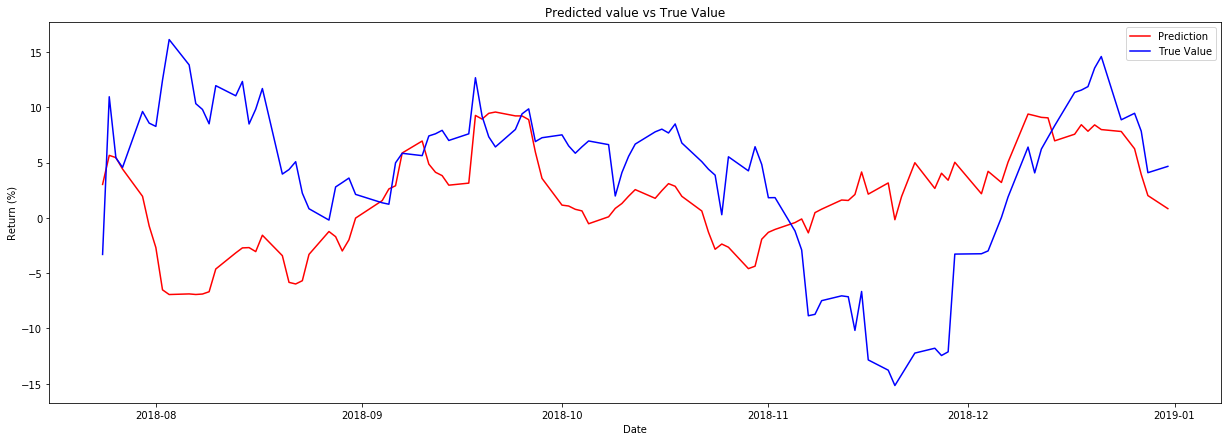

In [202]:
plt.figure(figsize=(21,7))
plt.plot(data.index[-len(pred):], np.expm1(pred)*100, color='red', label='Prediction')
plt.plot(data.index[-len(val):], np.expm1(val)*100, color='blue', label='True Value')
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.title('Predicted value vs True Value')
plt.legend(loc='best')
plt.show()

In [0]:
signal_pred = np.where(pred > 0 , 1,0)
signal_real = np.where(val > 0 , 1,0)

In [204]:
signal_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [205]:
signal_real

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## 10 days

In [0]:
df_fitting = df.copy()

In [208]:
# log 1 days returns
#df_fitting['lrets'] = np.log(df_fitting['Adj Close']/df_fitting['Adj Close'].shift(10))
# df_fitting['shi'] = df_fitting['Adj Close'].shift(10)
# df_fitting['10dayr'] = df_fitting['Adj Close']/df_fitting['Adj Close'].shift(10)
#df_fitting['lrets'] = np.log(df_fitting['Adj Close']/df_fitting['Adj Close'].shift(15))
df_fitting.dropna(inplace=True, axis=0)

df_fitting['Y'] = np.log(df_fitting['Adj Close']/df_fitting['Adj Close'].shift(10)).shift(-10)
df_fitting.dropna(axis=0, inplace=True)

print(df_fitting.shape[0])

2364


In [209]:
df_fitting.tail(20)

,Volume,Adj Close,MACD,stochastics,ATR,nltk_neg,nltk_neu,nltk_pos,textblob_sen,textblob_sub,Y
2019-05-20,38612300.0,183.089996,-4.397090,0.000000,8.720001,0.084,0.824,0.092,-0.019819,0.424595,-0.019023
2019-05-21,28364800.0,186.600006,-4.259886,12.604314,4.910004,0.111,0.759,0.130,0.098191,0.395218,-0.021998
2019-05-22,29748600.0,182.779999,-4.315485,0.000000,4.050003,0.099,0.827,0.074,0.055682,0.436396,0.013261
2019-05-23,36529700.0,179.660004,-4.450086,0.000000,4.970001,0.116,0.795,0.089,0.091913,0.374732,0.056747
2019-05-24,23714700.0,178.970001,-4.456566,0.000000,3.520004,0.110,0.814,0.076,0.120635,0.383973,0.073293
2019-05-28,27948200.0,178.229996,-4.371009,0.000000,2.679993,0.086,0.855,0.059,0.003369,0.355574,0.088950
2019-05-29,28481200.0,177.380005,-4.226199,0.000000,3.350006,0.126,0.783,0.091,0.061820,0.431587,0.090543
2019-05-30,21218400.0,178.300003,-3.912336,4.646458,2.559998,0.073,0.868,0.060,0.054311,0.415067,0.085163
2019-05-31,27043600.0,175.070007,-3.782775,0.000000,3.309998,0.108,0.773,0.119,0.190273,0.435175,0.096156
2019-06-03,40396100.0,173.300003,-3.678173,0.000000,7.649994,0.135,0.766,0.098,0.083058,0.390729,0.112267


In [0]:
'''
Function to preprocess data for training NN
  data: input dataframe
  N: number of previous day that you want to get for estimating y_future
  shuffle = True (default), choose to randomly suffle the data for better result

'''
def preprocess_df(data, N, shuffle=True):
    preprocess_data = data.copy()
    
#     scaler = RobustScaler()
#     preprocess_data = scaler.fit_transform(preprocess_data)    
    
    scaler = StandardScaler()
    preprocess_data = scaler.fit_transform(preprocess_data)    

    sequential_data = []  # this is a list that will CONTAIN the sequences
    # These will be our actual sequences. 
    # They are made with deque, which keeps the maximum length by popping out older values as new ones come in
    prev_days = deque(maxlen = N)  

    for i in preprocess_data:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target

        # if prev_days have 60 days of data
        if len(prev_days) == N:
            # sequential_data = [prev_days_data, target variable]
            sequential_data.append([np.array(prev_days), i[-1]])  
    if shuffle == True:
        random.shuffle(sequential_data)  # shuffle for good measure.

    X = []
    y = []

    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)
    
    del preprocess_data 
    
    if shuffle == True:
        return np.array(X), np.array(y) 
    else:
        return np.array(X), np.array(y), sequential_data, scaler

### final model

In [210]:
N = 30
N

30

In [211]:
df_train = df_fitting[df_fitting.index < '2019-01-01']
df_test = df_fitting[df_train.shape[0]-N:df_fitting.shape[0]]
print("train shape {}".format(df_train.shape))
print("test shape {}".format(df_test.shape))

train shape (2249, 11)
test shape (145, 11)


In [212]:
X_train, y_train = preprocess_df(df_train, N = 31,shuffle=True)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (2219, 31, 10)
y_train shape: (2219,)


In [213]:
X_val, y_val, scaled_data, prescaler = preprocess_df(df_test, N = 31, shuffle=False)
print('X_val shape: {}'.format(X_val.shape))
print('y_val shape: {}'.format(y_val.shape))

X_val shape: (115, 31, 10)
y_val shape: (115,)


In [0]:
def build_model():
    model = Sequential()
    model.add(CuDNNLSTM(256, input_shape=(X_train.shape[1:]), return_sequences=True))
    model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.

    model.add(CuDNNLSTM(128, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    
    model.add(CuDNNLSTM(64))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='tanh'))
    
   # opt = tf.keras.optimizers.RMSprop(lr=7e-3)
    model.compile(loss='mse',optimizer= 'adam', metrics=['mse'])
    
    return model

In [218]:
model_return10_vfinal = build_model()


model_return10_vfinal.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_7 (CuDNNLSTM)     (None, 31, 256)           274432    
_________________________________________________________________
batch_normalization_9 (Batch (None, 31, 256)           1024      
_________________________________________________________________
cu_dnnlstm_8 (CuDNNLSTM)     (None, 31, 128)           197632    
_________________________________________________________________
batch_normalization_10 (Batc (None, 31, 128)           512       
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 128)           0         
_________________________________________________________________
cu_dnnlstm_9 (CuDNNLSTM)     (None, 64)                49664     
_________________________________________________________________
batch_normalization_11 (Batc (None, 64)                256       
__________

In [226]:
# model = build_model()
# schedule = SGDRScheduler(min_lr=1e-3,
#                          max_lr=1e-2,
#                          steps_per_epoch=np.ceil(epoch_size/batch_size),
#                          lr_decay=0.9,
#                          cycle_length= 3,
#                          mult_factor=1.5)

model_return10_vfinal.fit(
    X_train,
    y_train,    
    epochs = 50, 
    batch_size = 32,
#     callbacks=[schedule],
    validation_split=0.3,
    verbose = 2)

Train on 1553 samples, validate on 666 samples
Epoch 1/50
 - 3s - loss: 0.2635 - mean_squared_error: 0.2635 - val_loss: 0.2497 - val_mean_squared_error: 0.2497
Epoch 2/50
 - 3s - loss: 0.2581 - mean_squared_error: 0.2581 - val_loss: 0.2558 - val_mean_squared_error: 0.2558
Epoch 3/50
 - 3s - loss: 0.2634 - mean_squared_error: 0.2634 - val_loss: 0.2520 - val_mean_squared_error: 0.2520
Epoch 4/50
 - 3s - loss: 0.2523 - mean_squared_error: 0.2523 - val_loss: 0.2526 - val_mean_squared_error: 0.2526
Epoch 5/50
 - 3s - loss: 0.2445 - mean_squared_error: 0.2445 - val_loss: 0.2525 - val_mean_squared_error: 0.2525
Epoch 6/50
 - 3s - loss: 0.2539 - mean_squared_error: 0.2539 - val_loss: 0.2452 - val_mean_squared_error: 0.2452
Epoch 7/50
 - 3s - loss: 0.2461 - mean_squared_error: 0.2461 - val_loss: 0.2509 - val_mean_squared_error: 0.2509
Epoch 8/50
 - 3s - loss: 0.2418 - mean_squared_error: 0.2418 - val_loss: 0.2545 - val_mean_squared_error: 0.2545
Epoch 9/50
 - 3s - loss: 0.2383 - mean_squared_er

In [0]:
data_dir = "drive/My Drive/DS/HasBrain-PracticalML/model/"
model_return10_vfinal.save(data_dir + 'model_return10_v1.h5')

# from keras.models import load_model
# model_return10_vfinal = load_model(data_dir + 'model_gru_lstm_v3.h5')

In [227]:
trainScore = model_return10_vfinal.evaluate(X_train, y_train, verbose=0)
print('Train RMSE: %2f' % math.sqrt(trainScore[0]))

testScore = model_return10_vfinal.evaluate(X_val, y_val, verbose=0)
print('Test RMSE: %2f'% math.sqrt(testScore[0]))

Train RMSE: 0.461530
Test RMSE: 0.993561


In [0]:
p = model_return10_vfinal.predict(X_val)

padding = np.zeros((len(p), 10))
pred_result = pd.DataFrame(data=padding)
pred_result['11'] = p
pred = prescaler.inverse_transform(pred_result)

val_result = pd.DataFrame(data=padding)
val_result['11'] = y_val
val = prescaler.inverse_transform(val_result)

pred = pred[:, -1]
val = val[:, -1]


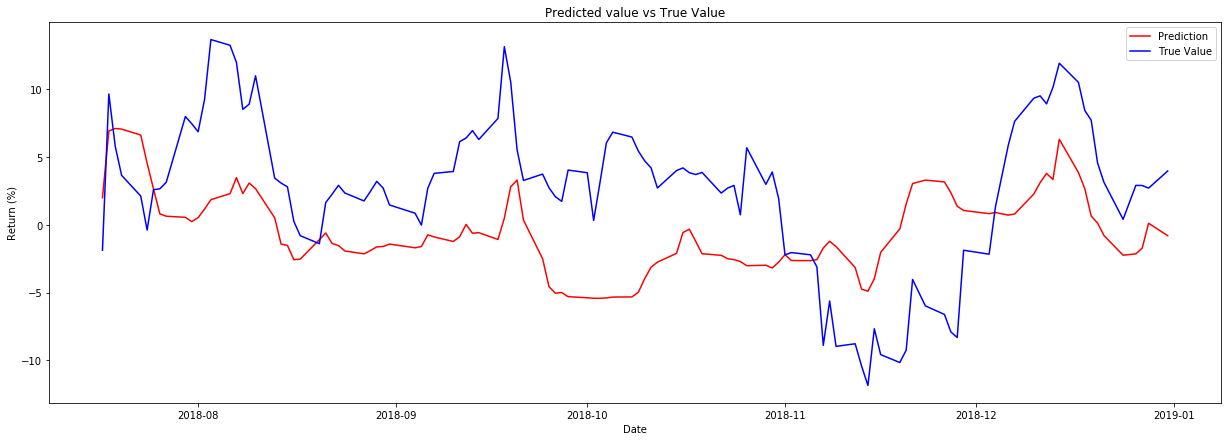

In [229]:
plt.figure(figsize=(21,7))
plt.plot(data.index[-len(pred):], np.expm1(pred)*100, color='red', label='Prediction')
plt.plot(data.index[-len(val):], np.expm1(val)*100, color='blue', label='True Value')
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.title('Predicted value vs True Value')
plt.legend(loc='best')
plt.show()

In [0]:
signal_pred = np.where(pred > 0 , 1,0)
signal_real = np.where(val > 0 , 1,0)

In [231]:
signal_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0])

In [232]:
signal_real

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

## 5 days

In [0]:
df_fitting = df.copy()

In [190]:
# log 1 days returns
#df_fitting['lrets'] = np.log(df_fitting['Adj Close']/df_fitting['Adj Close'].shift(10))
# df_fitting['shi'] = df_fitting['Adj Close'].shift(10)
# df_fitting['10dayr'] = df_fitting['Adj Close']/df_fitting['Adj Close'].shift(10)
#df_fitting['lrets'] = np.log(df_fitting['Adj Close']/df_fitting['Adj Close'].shift(15))
df_fitting.dropna(inplace=True, axis=0)

df_fitting['Y'] = np.log(df_fitting['Adj Close']/df_fitting['Adj Close'].shift(5)).shift(-5)
df_fitting.dropna(axis=0, inplace=True)

print(df_fitting.shape[0])

2369


In [191]:
df_fitting.tail(20)

,Volume,Adj Close,MACD,stochastics,ATR,nltk_neg,nltk_neu,nltk_pos,textblob_sen,textblob_sub,Y
2019-05-28,27948200.0,178.229996,-4.371009,0.000000,2.679993,0.086,0.855,0.059,0.003369,0.355574,0.007880
2019-05-29,28481200.0,177.380005,-4.226199,0.000000,3.350006,0.126,0.783,0.091,0.061820,0.431587,0.028675
2019-05-30,21218400.0,178.300003,-3.912336,4.646458,2.559998,0.073,0.868,0.060,0.054311,0.415067,0.038077
2019-05-31,27043600.0,175.070007,-3.782775,0.000000,3.309998,0.108,0.773,0.119,0.190273,0.435175,0.082627
2019-06-03,40396100.0,173.300003,-3.678173,0.000000,7.649994,0.135,0.766,0.098,0.083058,0.390729,0.105487
2019-06-04,30968000.0,179.639999,-3.008060,35.981828,6.529999,0.091,0.840,0.070,0.061741,0.338997,0.081070
2019-06-05,29773400.0,182.539993,-2.204119,55.065500,5.350006,0.116,0.804,0.081,0.043619,0.408386,0.061868
2019-06-06,22526300.0,185.220001,-1.344746,75.923570,3.320007,0.112,0.771,0.117,0.125161,0.441540,0.047087
2019-06-07,30684400.0,190.149994,-0.310639,100.000000,6.699997,0.123,0.780,0.097,0.050742,0.366488,0.013529
2019-06-10,26220900.0,192.580002,0.634550,100.000000,5.220001,0.143,0.745,0.112,0.113998,0.389160,0.006779


### final model

In [192]:
N = 15
N

15

In [193]:
df_train = df_fitting[df_fitting.index < '2019-01-01']
df_test = df_fitting[df_train.shape[0]-N+1:df_fitting.shape[0]]
print("train shape {}".format(df_train.shape))
print("test shape {}".format(df_test.shape))

train shape (2249, 11)
test shape (134, 11)


In [194]:
X_train, y_train = preprocess_df(df_train, N = N,shuffle=True)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (2235, 15, 10)
y_train shape: (2235,)


In [195]:
X_val, y_val, scaled_data, prescaler = preprocess_df(df_test, N = N, shuffle=False)
print('X_val shape: {}'.format(X_val.shape))
print('y_val shape: {}'.format(y_val.shape))

X_val shape: (120, 15, 10)
y_val shape: (120,)


In [196]:
df_test.shape

(134, 11)

In [0]:
def build_model():
    model = Sequential()
    model.add(CuDNNLSTM(256, input_shape=(X_train.shape[1:]), return_sequences=True))
    model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.

    model.add(CuDNNLSTM(128, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    
    model.add(CuDNNLSTM(64))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='tanh'))
    
   # opt = tf.keras.optimizers.RMSprop(lr=7e-3)
    model.compile(loss='mse',optimizer= 'adam', metrics=['mse'])
    
    return model

In [198]:
model_return5_vfinal = build_model()


model_return5_vfinal.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_31 (CuDNNLSTM)    (None, 15, 256)           274432    
_________________________________________________________________
batch_normalization_41 (Batc (None, 15, 256)           1024      
_________________________________________________________________
cu_dnnlstm_32 (CuDNNLSTM)    (None, 15, 128)           197632    
_________________________________________________________________
batch_normalization_42 (Batc (None, 15, 128)           512       
_________________________________________________________________
dropout_31 (Dropout)         (None, 15, 128)           0         
_________________________________________________________________
cu_dnnlstm_33 (CuDNNLSTM)    (None, 64)                49664     
_________________________________________________________________
batch_normalization_43 (Batc (None, 64)                256       
__________

In [199]:
# model = build_model()
# schedule = SGDRScheduler(min_lr=1e-3,
#                          max_lr=1e-2,
#                          steps_per_epoch=np.ceil(epoch_size/batch_size),
#                          lr_decay=0.9,
#                          cycle_length= 3,
#                          mult_factor=1.5)

model_return5_vfinal.fit(
    X_train,
    y_train,    
    epochs = 100, 
    batch_size = 64,
#     callbacks=[schedule],
    validation_split=0.3,
    verbose = 2)

Train on 1564 samples, validate on 671 samples
Epoch 1/100
 - 7s - loss: 1.3464 - mean_squared_error: 1.3464 - val_loss: 1.0700 - val_mean_squared_error: 1.0700
Epoch 2/100
 - 1s - loss: 1.1103 - mean_squared_error: 1.1103 - val_loss: 0.9751 - val_mean_squared_error: 0.9751
Epoch 3/100
 - 1s - loss: 1.0440 - mean_squared_error: 1.0440 - val_loss: 1.0133 - val_mean_squared_error: 1.0133
Epoch 4/100
 - 1s - loss: 1.0146 - mean_squared_error: 1.0146 - val_loss: 0.9831 - val_mean_squared_error: 0.9831
Epoch 5/100
 - 1s - loss: 0.9902 - mean_squared_error: 0.9902 - val_loss: 0.9176 - val_mean_squared_error: 0.9176
Epoch 6/100
 - 1s - loss: 0.9042 - mean_squared_error: 0.9042 - val_loss: 0.8437 - val_mean_squared_error: 0.8437
Epoch 7/100
 - 1s - loss: 0.8730 - mean_squared_error: 0.8730 - val_loss: 0.8523 - val_mean_squared_error: 0.8523
Epoch 8/100
 - 1s - loss: 0.8504 - mean_squared_error: 0.8504 - val_loss: 0.7287 - val_mean_squared_error: 0.7287
Epoch 9/100
 - 1s - loss: 0.7603 - mean_s

In [0]:
data_dir = "drive/My Drive/DS/HasBrain-PracticalML/model/"
model_return5_vfinal.save(data_dir + 'model_return5_AAPL_v1.h5')

# from keras.models import load_model
# model_return10_vfinal = load_model(data_dir + 'model_gru_lstm_v3.h5')

In [200]:
trainScore = model_return5_vfinal.evaluate(X_train, y_train, verbose=0)
print('Train RMSE: %2f' % math.sqrt(trainScore[0]))

testScore = model_return5_vfinal.evaluate(X_val, y_val, verbose=0)
print('Test RMSE: %2f'% math.sqrt(testScore[0]))

Train RMSE: 0.529668
Test RMSE: 1.006151


In [0]:
p = model_return5_vfinal.predict(X_val)

padding = np.zeros((len(p), 10))
pred_result = pd.DataFrame(data=padding)
pred_result['11'] = p
pred = prescaler.inverse_transform(pred_result)

val_result = pd.DataFrame(data=padding)
val_result['11'] = y_val
val = prescaler.inverse_transform(val_result)

pred = pred[:, -1]
val = val[:, -1]


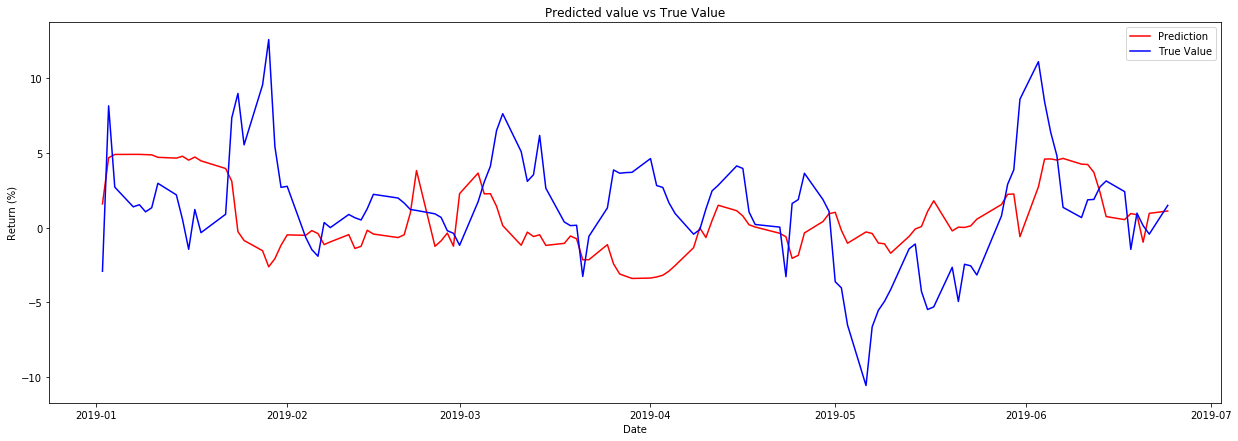

In [202]:
plt.figure(figsize=(21,7))
plt.plot(df_fitting.index[-len(pred):], np.expm1(pred)*100, color='red', label='Prediction')
plt.plot(df_fitting.index[-len(val):], np.expm1(val)*100, color='blue', label='True Value')
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.title('Predicted value vs True Value')
plt.legend(loc='best')
plt.show()

In [0]:
signal_pred = np.where(pred > 0 , 1,0)
signal_real = np.where(val > 0 , 1,0)

In [32]:
signal_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
signal_real

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1])